# **Installing , Importing libraries & Loading the Dataset**

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [2]:
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#load the dataset
drive.mount('/content/drive')
df= pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")

Mounted at /content/drive


# **Data Exploration**

**Dataset rows and columns**

In [3]:
df.shape

(6362620, 11)

**Fisrt five rows of the dataset**

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Displaying data types of each column**

In [5]:
#Displaying the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Descriptive statistics for numerical columns**

In [ ]:
#Describing the statistical measures of data set
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# **Exploratory Data Analysis**

**Displaying distribution of fraudulent and non-fraudulent transactions**

Count of non-fraudulent transactions (0): 6354407
Count of fraudulent transactions (1): 8213


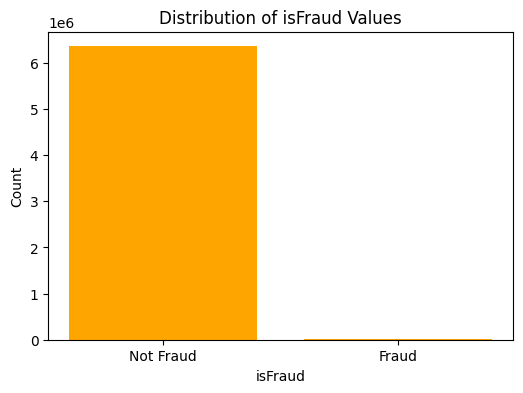

In [6]:
# Count occurrences of 0 and 1 in the "isFraud" column
fraud_counts = df['isFraud'].value_counts()

# Print the counts
print("Count of non-fraudulent transactions (0):", fraud_counts[0])
print("Count of fraudulent transactions (1):", fraud_counts[1])

# Count the occurrences of each value in the "isFraud" column
fraud_counts = df["isFraud"].value_counts()

# Count the occurrences of each value in the "isFraud" column
fraud_counts = df["isFraud"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(fraud_counts.index, fraud_counts.values, color='orange')
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.title("Distribution of isFraud Values")
plt.xticks(fraud_counts.index, ['Not Fraud', 'Fraud'])
plt.show()

**Displaying transaction types in the dataset**

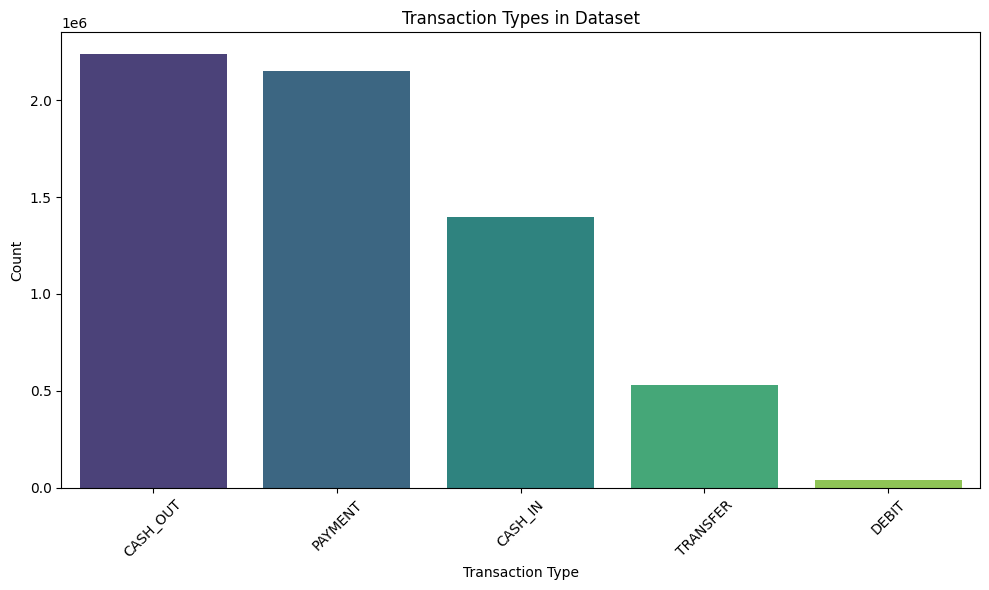

In [7]:
# Group transactions by type and count the occurrences
transaction_counts = df['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Transaction Types in Dataset')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**Fraudulent transactions in the transaction types**

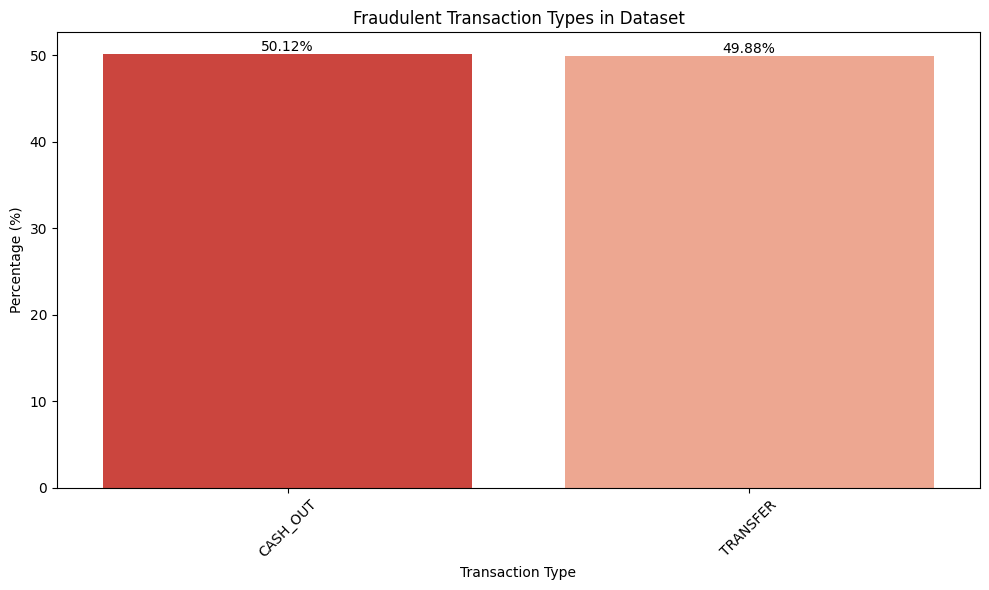

In [8]:
# Filter the dataset to include only fraud transactions
fraud_df = df[df['isFraud'] == 1]

# Group fraud transactions by type and count the occurrences
fraud_transaction_counts = fraud_df['type'].value_counts()

# Calculate the percentage of each transaction type
fraud_transaction_percentages = (fraud_transaction_counts / fraud_transaction_counts.sum()) * 100

# Create a bar plot for fraud transactions with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=fraud_transaction_percentages.index, y=fraud_transaction_percentages.values, palette='Reds_r')
plt.title('Fraudulent Transaction Types in Dataset')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

# Show the plot
plt.show()

**Distribution of fraud and non-fraud transactions in 'oldbalanceDest' & 'oldbalanceOrg'**

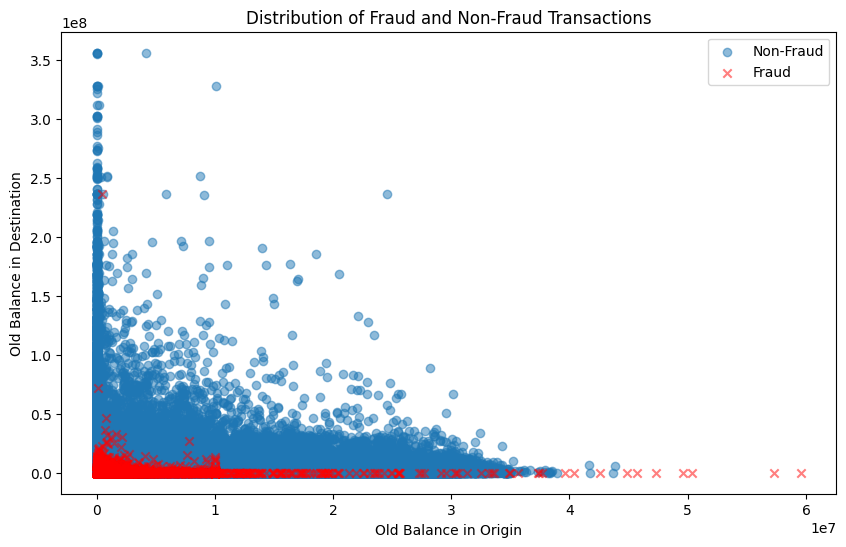

In [9]:
# Filter data for fraud and non-fraud transactions
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(non_fraud_data['oldbalanceOrg'], non_fraud_data['oldbalanceDest'], label='Non-Fraud', alpha=0.5)
plt.scatter(fraud_data['oldbalanceOrg'], fraud_data['oldbalanceDest'], label='Fraud', alpha=0.5, marker='x', color='red')

plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Old Balance in Origin')
plt.ylabel('Old Balance in Destination')
plt.legend()
plt.show()


In [10]:
# Filter the dataset to include only 'CASH_OUT' and 'TRANSFER' transaction types
filtered_df = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

**Correlation matrix for numerical columns**

<ipython-input-11-1c8ffc5079b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


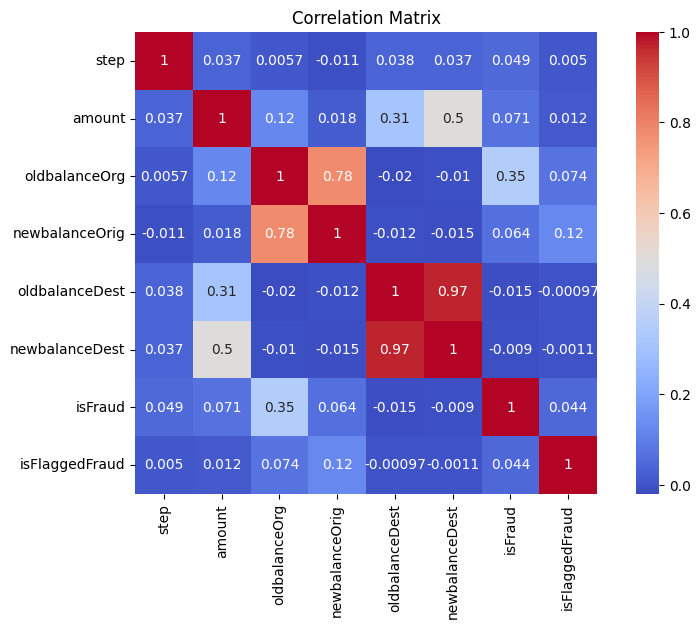

In [11]:
correlation_matrix = filtered_df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**Dropping columns from the dataset**

In [12]:
filtered_df = filtered_df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [13]:
filtered_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


**Checking missing values in the dataset**

In [14]:
Null_values = filtered_df.isnull().sum()
print(Null_values)

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


**Performing label encoding for column 'type'**

In [15]:
categorical_columns = ['type']
# Label Encoding for categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col])
    label_encoders[col] = le

**Preparing the data for GAN to generate synthetic fraudulent samples**

In [16]:
# Filter the original dataframe to include only fraudulent transactions
fraudulent_df = filtered_df[filtered_df['isFraud'] == 1]

In [17]:
fraudulent_count = len(fraudulent_df)
print("Number of fraudulent samples:", fraudulent_count)

Number of fraudulent samples: 8213


In [18]:
# Standard Scaling for numerical columns
scaler = StandardScaler()
columns_to_normalize = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fraudulent_df[columns_to_normalize] = scaler.fit_transform(fraudulent_df[columns_to_normalize])

<ipython-input-18-e1ecc6e9ec3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_df[columns_to_normalize] = scaler.fit_transform(fraudulent_df[columns_to_normalize])


# **GAN MODEL**

In [ ]:
#Define GAN parameters
latent_dim = 100
output_dim = fraudulent_df.shape[1]
input_dim = fraudulent_df.shape[1]
batch_size = 128
epochs = 80
num_generated_samples = 20000

# Define Generator and Discriminator networks
def build_generator(latent_dim, output_dim):
    model = keras.Sequential()
    model.add(layers.Input(shape=(latent_dim,)))
    model.add(layers.Dense(128, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(64, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(output_dim, activation='tanh'))
    return model

def build_discriminator(input_dim):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(20, kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


# Define GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = True  # Set discriminator to trainable
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = keras.Model(gan_input, gan_output)
    return gan

# Build networks
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

# Compile networks with different optimizers and loss functions
discriminator_optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-4)  # Adjusted optimizer
generator_optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0002, weight_decay=1e-4)  # Adjusted optimizer


discriminator.compile(optimizer=discriminator_optimizer, loss='hinge')
gan.compile(optimizer=generator_optimizer, loss='hinge')

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Initialize loss lists
discriminator_losses = []
generator_losses = []

# Define training loop
def train_gan(generator, discriminator, gan, fraudulent_df, batch_size, latent_dim, epochs):
    for epoch in range(epochs):
        for _ in range(num_generated_samples // batch_size):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)

            combined_data = np.concatenate([generated_data, fraudulent_df])
            labels = np.concatenate([np.ones((batch_size, 1)), -np.ones((fraudulent_df.shape[0], 1))])

            # Train discriminator
            discriminator_loss = discriminator.train_on_batch(combined_data, labels)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generator_loss = gan.train_on_batch(noise, -np.ones((batch_size, 1)))

        # Append the losses once per epoch
        discriminator_losses.append(discriminator_loss)
        generator_losses.append(generator_loss)

        print(f"Epoch {epoch}, Disc Loss: {discriminator_loss}, Gen Loss: {generator_loss}")

# Train GAN
train_gan(generator, discriminator, gan, fraudulent_df, batch_size, latent_dim, epochs)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
Epoch 45, Disc Loss: 1.0011307001113892, Gen Loss: 1.0008788108825684
4/4 [==============================] - 0s 3ms/step
Epoch 46, Disc Loss: 1.0010684728622437, Gen Loss: 1.0008289813995361
4/4 [==============================] - 0s 3ms/step
Epoch 47, Disc Loss: 1.0010087490081787, Gen Loss: 1.0007822513580322
4/4 [==============================] - 0s 3ms/step
Epoch 48, Disc Loss: 1.0009517669677734, Gen Loss: 1.0007364749908447
4/4 [==============================] - 0s 4ms/step
Epoch 49, Disc Loss: 1.0008974075317383, Gen Loss: 1.0006942749023438
4/4 [==============================] - 0s 3ms/step
Epoch 50, Disc Loss: 1.0008457899093628, Gen Loss: 1.0006533861160278
4/4 [==============================] - 0s 3ms/step
Epoch 51, Disc Loss: 1.0007963180541992, Gen Loss: 1.0006136894226074
4/4 [==============================] - 0s 3ms/step
Epoch 52, Disc Loss: 1.0007493495941162, Gen Loss: 

**Training loss of Generator & Discriminator**

In [ ]:
# Plot loss values
plt.plot(discriminator_losses, label='Discriminator Loss', color='blue', linestyle='solid')  # Use solid line
plt.plot(generator_losses, label='Generator Loss', color='orange', linestyle='dashed')  # Use dashed line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of Generator and Discriminator in GAN')
plt.legend()
plt.show()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 8)                 22472     
                                                                 
 sequential_1 (Sequential)   (None, 1)                 401       
                                                                 
Total params: 22873 (89.35 KB)
Trainable params: 22489 (87.85 KB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________


**Generating synthetic fraudulent transactions**

In [ ]:
# Generate synthetic fraudulent transactions
def generate_synthetic_fraud_samples(generator, num_samples, latent_dim):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_samples = generator.predict(noise)
    return synthetic_samples

# Generate synthetic fraud samples
synthetic_fraud_samples = generate_synthetic_fraud_samples(generator, num_generated_samples, latent_dim)


In [ ]:
# Generate new fraudulent samples
noise = np.random.normal(0, 1, (num_generated_samples, latent_dim))
generated_data_fraud = generator.predict(noise)

In [ ]:
column_names = fraudulent_df.columns.tolist()
generated_df_fraud = pd.DataFrame(data=generated_data_fraud, columns=column_names)

In [ ]:
generated_df_fraud['isFraud'] = 1

# Concatenate generated fraudulent samples with the original dataframe
combined_df = pd.concat([filtered_df, generated_df_fraud], ignore_index=True)

# Check the count of fraudulent transactions in the generated samples
generated_fraud_count = len(generated_df_fraud)
print(f"Count of Fraudulent Transactions in Generated Samples: {generated_fraud_count}")

**Comparison of Original and Generated Fraudulent Transactions**

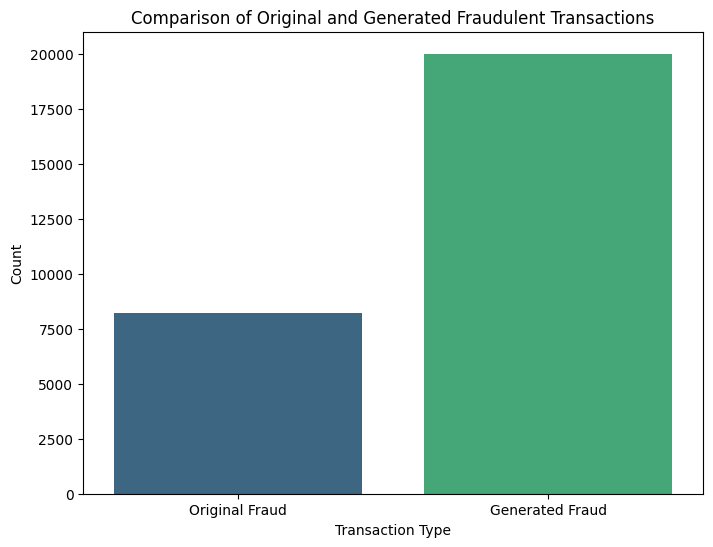

In [ ]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Plot the original fraud counts
sns.barplot(x=["Original Fraud", "Generated Fraud"], y=[fraud_counts[1], generated_fraud_count], palette="viridis")

# Add labels and title
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Comparison of Original and Generated Fraudulent Transactions")

# Show the plot
plt.show()

**Displaying Extended dataset**

In [ ]:
combined_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.000000,1.000000,181.000000,181.000000,0.000000,0.000000,0.000000e+00,1
1,1.000000,0.000000,181.000000,181.000000,0.000000,21182.000000,0.000000e+00,1
2,1.000000,0.000000,229133.940000,15325.000000,0.000000,5083.000000,5.151344e+04,0
3,1.000000,1.000000,215310.300000,705.000000,0.000000,22425.000000,0.000000e+00,0
4,1.000000,1.000000,311685.890000,10835.000000,0.000000,6267.000000,2.719173e+06,0
...,...,...,...,...,...,...,...,...
2790404,0.904932,0.975405,-0.933096,0.933940,0.999788,-0.934483,9.529309e-01,1
2790405,0.741544,0.917189,-0.809007,0.832319,0.195831,-0.831500,8.664542e-01,1
2790406,0.728669,0.911169,-0.795477,0.824965,0.508749,-0.823092,8.554446e-01,1
2790407,0.870316,0.958687,-0.923046,0.912735,-0.985562,-0.913939,9.448037e-01,1


**Distribution of Real and Generated Data**

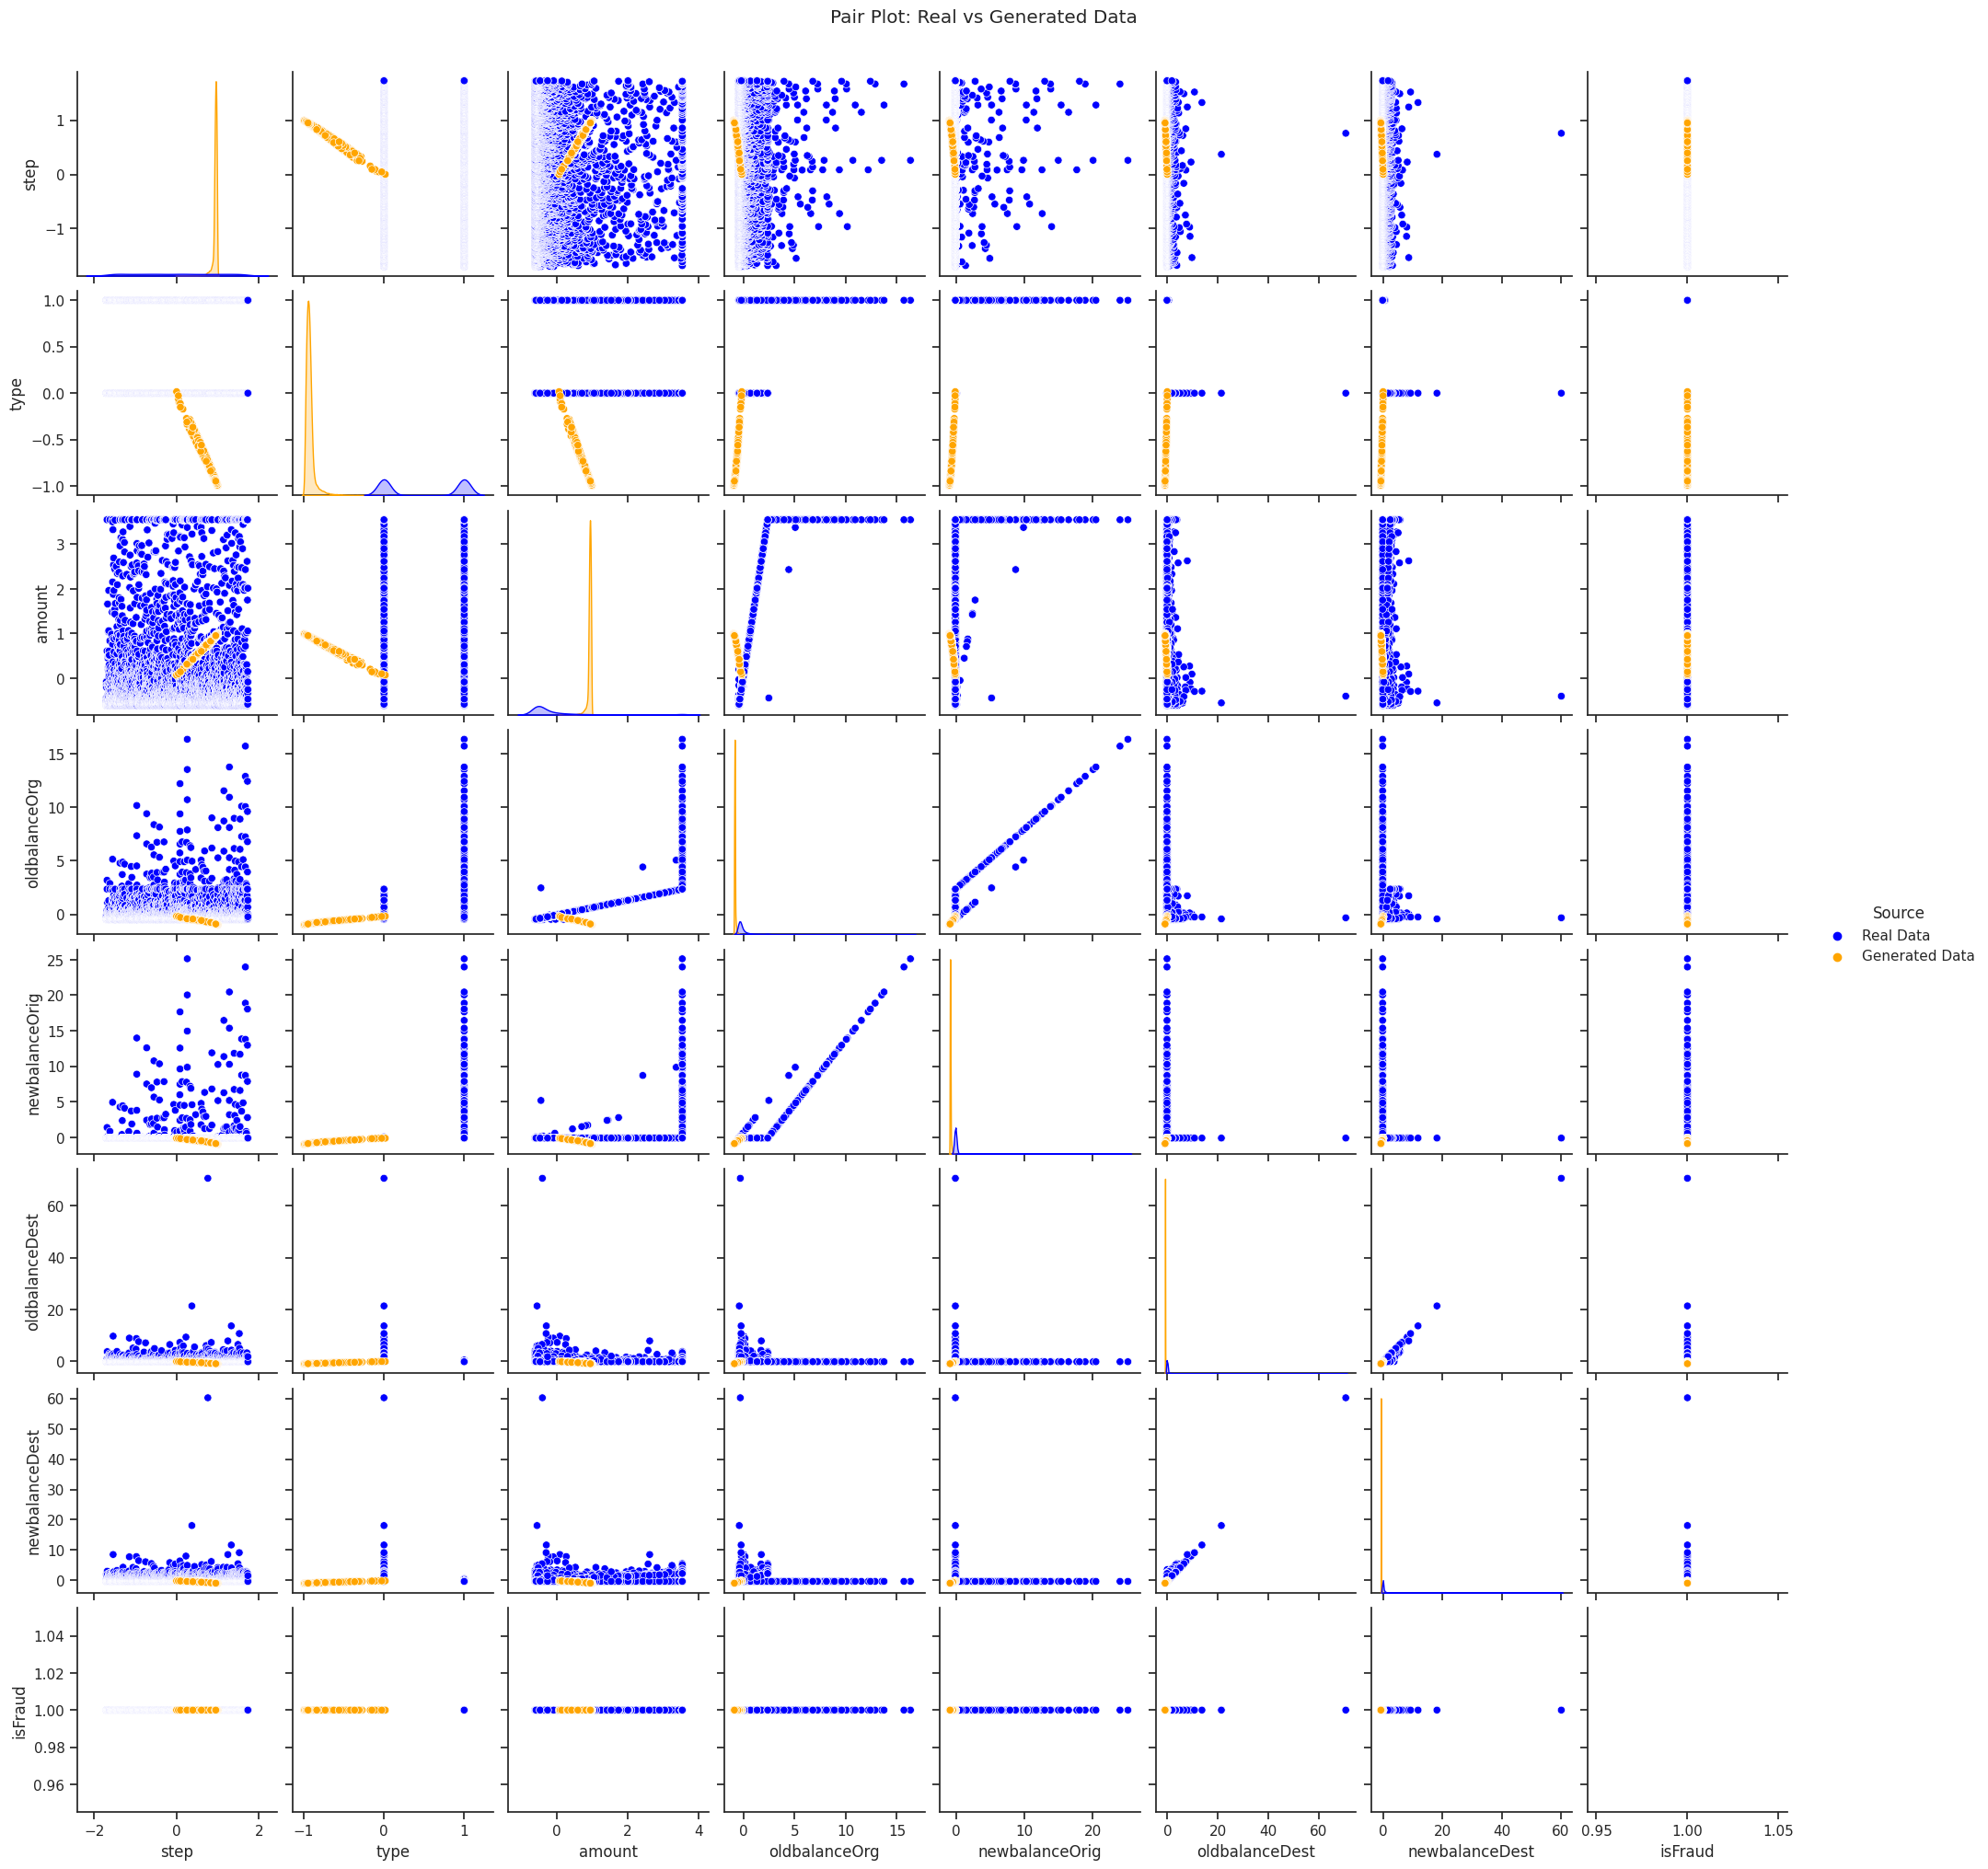

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

real_data = fraudulent_df.copy()
generated_data = generated_df_fraud.copy()

# Add a label column to differentiate between real and generated data
real_data['Source'] = 'Real Data'
generated_data['Source'] = 'Generated Data'

# Combine real and generated data
combined_data = pd.concat([real_data, generated_data], ignore_index=True)

# Plot pair plot with different colors for real and generated data
sns.set(style="ticks")
sns.pairplot(combined_data, hue='Source', palette={'Real Data': 'blue', 'Generated Data': 'orange'})
plt.suptitle('Pair Plot: Real vs Generated Data', y=1.02)
plt.show()


**Checking for missing values in Extended Dataset**

In [ ]:
# Check for NaN values in the dataset
nan_counts = combined_df.isnull().sum()

# Print the counts of NaN values for each column
print("NaN Value Counts:")
print(nan_counts)

NaN Value Counts:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


**Preparing data for splitting for both Original and Extended dataset**

**SEPRATING FEATURES FOR EXTENDED DATASET**

In [ ]:
# Separate features (X) and target variable (y)
A = combined_df.drop('isFraud', axis=1)
B = combined_df['isFraud']

**SEPARATING FEATURES FOR ORIGINAL DATA**

In [ ]:
# Separate features (X) and target variable (y)
X = filtered_df.drop('isFraud', axis=1)
y = filtered_df['isFraud']

**SPLITTING FOR ORIGINAL DATA**

In [ ]:
# Normalization of the dataset
std_scaler = StandardScaler()
X_scaled = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**SPLITTING FOR EXTENDED DATA**

In [ ]:
from sklearn.model_selection import train_test_split
# Normalization of the dataset
std_scaler = StandardScaler()
A_scaled = pd.DataFrame(std_scaler.fit_transform(A), columns=A.columns)

# Split the data into training and testing sets
A_train_original, A_test_original, B_train_original, B_test_original = train_test_split(A_scaled, B, test_size=0.3, random_state=42)


# **Modelling**

# **Machine learning Models**

**RANDOM FOREST FOR ORIGINAL DATA**

In [ ]:
# Create a RandomForestClassifier with specified parameters
model_rf = RandomForestClassifier(n_estimators=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_depth=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state = 42)

# Fit the model on the training set
model_rf.fit(X_train_original, y_train_original)

# Predictions on the training set
y_train_pred_random = model_rf.predict(X_train_original)

# Predictions on the testing set
y_test_pred_random = model_rf.predict(X_test_original)

# Calculate metrics for training set
accuracy_train = accuracy_score(y_train_original, y_train_pred_random)
precision_train = precision_score(y_train_original, y_train_pred_random)
recall_train = recall_score(y_train_original, y_train_pred_random)
f1_train = f1_score(y_train_original, y_train_pred_random)

# Calculate metrics for testing set
accuracy_test = accuracy_score(y_test_original, y_test_pred_random)
precision_test = precision_score(y_test_original, y_test_pred_random)
recall_test = recall_score(y_test_original, y_test_pred_random)
f1_test = f1_score(y_test_original, y_test_pred_random)

# Print metrics for training set for original data
print("\nTraining Set Metrics: original data")
print(f"Accuracy: {accuracy_train:.3f}")
print(f"Precision: {precision_train:.3f}")
print(f"Recall: {recall_train:.3f}")
print(f"F1 Score: {f1_train:.3f}")

# Print metrics for testing set for original data
print("\nTesting Set Metrics: original data")
print(f"Accuracy: {accuracy_test:.3f}")
print(f"Precision: {precision_test:.3f}")
print(f"Recall: {recall_test:.3f}")
print(f"F1 Score: {f1_test:.3f}")

# Cross-validation scores for multiple metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model_rf, X_train_original, y_train_original, cv=5, scoring=scoring_metrics)

# Print cross-validation scores for original data
print("\nCross-Validation Scores: original data")
for metric in scoring_metrics:
    print(f"{metric.capitalize()}: {cv_results[f'test_{metric}'].mean():.3f}")


Training Set Metrics: original data
Accuracy: 0.975
Precision: 0.098
Recall: 0.924
F1 Score: 0.177

Testing Set Metrics: original data
Accuracy: 0.974
Precision: 0.099
Recall: 0.932
F1 Score: 0.179

Cross-Validation Scores: original data
Accuracy: 0.974
Precision: 0.094
Recall: 0.918
F1: 0.171


**RANDOM FOREST FOR EXTENDED DATASET**

In [ ]:
# Create a RandomForestClassifier with specified parameters
model_rf_syn = RandomForestClassifier(n_estimators=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_depth=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state = 42)

# Fit the model on the training set
model_rf_syn.fit(A_train_original, B_train_original)

# Predictions on the training set
B_train_pred_ran_syn = model_rf_syn.predict(A_train_original)

# Predictions on the testing set
B_test_pred_ran_syn = model_rf_syn.predict(A_test_original)

# Calculate metrics for training set
accuracy_train_syn = accuracy_score(B_train_original, B_train_pred_ran_syn)
precision_train_syn = precision_score(B_train_original, B_train_pred_ran_syn)
recall_train_syn = recall_score(B_train_original, B_train_pred_ran_syn)
f1_train_syn = f1_score(B_train_original, B_train_pred_ran_syn)

# Calculate metrics for testing set
accuracy_test_syn = accuracy_score(B_test_original, B_test_pred_ran_syn)
precision_test_syn = precision_score(B_test_original, B_test_pred_ran_syn)
recall_test_syn = recall_score(B_test_original, B_test_pred_ran_syn)
f1_test_syn = f1_score(B_test_original, B_test_pred_ran_syn)

# Print metrics for training set for synthetic data
print("\nTraining Set Metrics: Extended data")
print(f"Accuracy: {accuracy_train_syn:.3f}")
print(f"Precision: {precision_train_syn:.3f}")
print(f"Recall: {recall_train_syn:.3f}")
print(f"F1 Score: {f1_train_syn:.3f}")

# Print metrics for testing set for synthetic data
print("\nTesting Set Metrics: Extended data")
print(f"Accuracy: {accuracy_test_syn:.3f}")
print(f"Precision: {precision_test_syn:.3f}")
print(f"Recall: {recall_test_syn:.3f}")
print(f"F1 Score: {f1_test_syn:.3f}")

# Cross-validation scores for multiple metrics
scoring_metrics_syn = ['accuracy', 'precision', 'recall', 'f1']
cv_results_syn = cross_validate(model_rf_syn, A_train_original, B_train_original, cv=5, scoring=scoring_metrics_syn)

# Print cross-validation scores for synthetic data
print("\nCross-Validation Scores: Extended data")
for metrics in scoring_metrics_syn:
    print(f"{metrics.capitalize()}: {cv_results_syn[f'test_{metrics}'].mean():.3f}")


Training Set Metrics: Extended data
Accuracy: 0.998
Precision: 0.833
Recall: 0.942
F1 Score: 0.884

Testing Set Metrics: Extended data
Accuracy: 0.998
Precision: 0.838
Recall: 0.943
F1 Score: 0.887

Cross-Validation Scores: Extended data
Accuracy: 0.998
Precision: 0.838
Recall: 0.940
F1: 0.885


**SVM Model for original data**

In [ ]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42)

# Fit the model on the training set
model_svm.fit(X_train_original, y_train_original)

# Predictions on the training set
y_train_pred_svm = model_svm.predict(X_train_original)

# Predictions on the testing set
y_test_pred_svm = model_svm.predict(X_test_original)

# Calculate metrics for training set
accuracy_train_svm = accuracy_score(y_train_original, y_train_pred_svm)
precision_train_svm = precision_score(y_train_original, y_train_pred_svm)
recall_train_svm = recall_score(y_train_original, y_train_pred_svm)
f1_train_svm = f1_score(y_train_original, y_train_pred_svm)

# Calculate metrics for testing set
accuracy_test_svm = accuracy_score(y_test_original, y_test_pred_svm)
precision_test_svm = precision_score(y_test_original, y_test_pred_svm)
recall_test_svm = recall_score(y_test_original, y_test_pred_svm)
f1_test_svm = f1_score(y_test_original, y_test_pred_svm)

# Print metrics for training set
print("\nTraining Set Metrics (SVM): Original data")
print(f"Accuracy: {accuracy_train_svm:.3f}")
print(f"Precision: {precision_train_svm:.3f}")
print(f"Recall: {recall_train_svm:.3f}")
print(f"F1 Score: {f1_train_svm:.3f}")

# Print metrics for testing set
print("\nTesting Set Metrics (SVM): Original data")
print(f"Accuracy: {accuracy_test_svm:.3f}")
print(f"Precision: {precision_test_svm:.3f}")
print(f"Recall: {recall_test_svm:.3f}")
print(f"F1 Score: {f1_test_svm:.3f}")

# Cross-validation scores for multiple metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model_svm, X_train_original, y_train_original, cv=5, scoring=scoring_metrics)

# Print cross-validation scores
print("\nCross-Validation Scores (SVM): Original data")
for metric in scoring_metrics:
    print(f"{metric.capitalize()}: {cv_results[f'test_{metric}'].mean():.3f}")


Training Set Metrics (SVM): Original data
Accuracy: 0.999
Precision: 0.983
Recall: 0.571
F1 Score: 0.722

Testing Set Metrics (SVM): Original data
Accuracy: 0.999
Precision: 0.984
Recall: 0.554
F1 Score: 0.709

Cross-Validation Scores (SVM): Original data
Accuracy: 0.999
Precision: 0.982
Recall: 0.550
F1: 0.705


**SVM model for Extended data**

In [ ]:
model_svm_syn = SVC(kernel='rbf', C=1.0, gamma='scale',random_state=42)

# Fit the model on the training set
model_svm_syn.fit(A_train_original, B_train_original)

# Predictions on the training set
B_train_pred_svm = model_svm_syn.predict(A_train_original)

# Predictions on the testing set
B_test_pred_svm = model_svm_syn.predict(A_test_original)

# Calculate metrics for training set
accuracy_train_svm_syn = accuracy_score(B_train_original, B_train_pred_svm)
precision_train_svm_syn = precision_score(B_train_original, B_train_pred_svm)
recall_train_svm_syn = recall_score(B_train_original, B_train_pred_svm)
f1_train_svm_syn = f1_score(B_train_original, B_train_pred_svm)

# Calculate metrics for testing set
accuracy_test_svm_syn = accuracy_score(B_test_original, B_test_pred_svm)
precision_test_svm_syn = precision_score(B_test_original, B_test_pred_svm)
recall_test_svm_syn = recall_score(B_test_original, B_test_pred_svm)
f1_test_svm_syn = f1_score(B_test_original, B_test_pred_svm)

# Print metrics for training set
print("\nTraining Set Metrics (SVM): Extended data")
print(f"Accuracy: {accuracy_train_svm_syn:.3f}")
print(f"Precision: {precision_train_svm_syn:.3f}")
print(f"Recall: {recall_train_svm_syn:.3f}")
print(f"F1 Score: {f1_train_svm_syn:.3f}")

# Print metrics for testing set
print("\nTesting Set Metrics (SVM): Extended data")
print(f"Accuracy: {accuracy_test_svm_syn:.3f}")
print(f"Precision: {precision_test_svm_syn:.3f}")
print(f"Recall: {recall_test_svm_syn:.3f}")
print(f"F1 Score: {f1_test_svm_syn:.3f}")

# Cross-validation scores for multiple metrics
scoring_metrics_svm_syn = ['accuracy', 'precision', 'recall', 'f1']
cv_results_svm_syn = cross_validate(model_svm_syn, A_train_original, B_train_original, cv=5, scoring=scoring_metrics_svm_syn)

# Print cross-validation scores
print("\nCross-Validation Scores (SVM): Extended data")
for metric_svm in scoring_metrics_svm_syn:
    print(f"{metric_svm.capitalize()}: {cv_results_svm_syn[f'test_{metric_svm}'].mean():.3f}")


Training Set Metrics (SVM): Extended data
Accuracy: 0.999
Precision: 0.989
Recall: 0.880
F1 Score: 0.932

Testing Set Metrics (SVM): Extended data
Accuracy: 0.999
Precision: 0.987
Recall: 0.877
F1 Score: 0.929

Cross-Validation Scores (SVM): Extended data
Accuracy: 0.999
Precision: 0.988
Recall: 0.875
F1: 0.928


**CATBOOST MODEL FOR ORIGINAL DATA**

In [ ]:
# Create a CatBoostClassifier with specified parameters
model_catboost = CatBoostClassifier(iterations=500, depth=5, learning_rate=0.01,loss_function='Logloss',random_state=42)

# Fit the model on the training set
model_catboost.fit(X_train_original, y_train_original)

# Predictions on the training set
y_train_pred_catboost = model_catboost.predict(X_train_original)

# Predictions on the testing set
y_test_pred_catboost = model_catboost.predict(X_test_original)

# Calculate metrics for training set
accuracy_train_catboost = accuracy_score(y_train_original, y_train_pred_catboost)
precision_train_catboost = precision_score(y_train_original, y_train_pred_catboost)
recall_train_catboost = recall_score(y_train_original, y_train_pred_catboost)
f1_train_catboost = f1_score(y_train_original, y_train_pred_catboost)

# Calculate metrics for testing set
accuracy_test_catboost = accuracy_score(y_test_original, y_test_pred_catboost)
precision_test_catboost = precision_score(y_test_original, y_test_pred_catboost)
recall_test_catboost = recall_score(y_test_original, y_test_pred_catboost)
f1_test_catboost = f1_score(y_test_original, y_test_pred_catboost)

# Initialize k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store cross-validation results
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_original, y_train_original):
    X_train_fold, X_val_fold = X_train_original.iloc[train_index], X_train_original.iloc[val_index]
    y_train_fold, y_val_fold = y_train_original.iloc[train_index], y_train_original.iloc[val_index]

    # Fit the model on the training fold
    model_catboost.fit(X_train_fold, y_train_fold)

    # Predictions on the validation fold
    y_val_pred_catboost = model_catboost.predict(X_val_fold)

    # Calculate metrics for the validation fold
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred_catboost)
    precision_fold = precision_score(y_val_fold, y_val_pred_catboost)
    recall_fold = recall_score(y_val_fold, y_val_pred_catboost)
    f1_fold = f1_score(y_val_fold, y_val_pred_catboost)

    # Append results to the lists
    cv_accuracy.append(accuracy_fold)
    cv_precision.append(precision_fold)
    cv_recall.append(recall_fold)
    cv_f1.append(f1_fold)

# Calculate mean and standard deviation of cross-validation results
cv_accuracy_mean = sum(cv_accuracy) / len(cv_accuracy)
cv_precision_mean = sum(cv_precision) / len(cv_precision)
cv_recall_mean = sum(cv_recall) / len(cv_recall)
cv_f1_mean = sum(cv_f1) / len(cv_f1)

# Print metrics for training set
print("\nTraining Set Metrics (CatBoost): Original data")
print(f"Accuracy: {accuracy_train_catboost:.3f}")
print(f"Precision: {precision_train_catboost:.3f}")
print(f"Recall: {recall_train_catboost:.3f}")
print(f"F1 Score: {f1_train_catboost:.3f}")

# Print metrics for testing set
print("\nTesting Set Metrics (CatBoost): Original data")
print(f"Accuracy: {accuracy_test_catboost:.3f}")
print(f"Precision: {precision_test_catboost:.3f}")
print(f"Recall: {recall_test_catboost:.3f}")
print(f"F1 Score: {f1_test_catboost:.3f}")

# Print cross-validation metrics
print("\nCross-Validation Metrics (CatBoost): Original data")
print(f"Accuracy: {cv_accuracy_mean:.3f}")
print(f"Precision: {cv_precision_mean:.3f}")
print(f"Recall: {cv_recall_mean:.3f}")
print(f"F1 Score: {cv_f1_mean:.3f}")

0:	learn: 0.6546959	total: 398ms	remaining: 3m 18s
1:	learn: 0.6182721	total: 711ms	remaining: 2m 57s
2:	learn: 0.5877692	total: 1000ms	remaining: 2m 45s
3:	learn: 0.5562260	total: 1.31s	remaining: 2m 42s
4:	learn: 0.5264905	total: 1.61s	remaining: 2m 39s
5:	learn: 0.5026508	total: 1.88s	remaining: 2m 34s
6:	learn: 0.4724150	total: 2.17s	remaining: 2m 33s
7:	learn: 0.4483571	total: 2.49s	remaining: 2m 32s
8:	learn: 0.4215352	total: 2.78s	remaining: 2m 31s
9:	learn: 0.3984236	total: 3.06s	remaining: 2m 30s
10:	learn: 0.3755796	total: 3.37s	remaining: 2m 29s
11:	learn: 0.3595318	total: 3.61s	remaining: 2m 26s
12:	learn: 0.3384129	total: 3.91s	remaining: 2m 26s
13:	learn: 0.3185702	total: 4.21s	remaining: 2m 26s
14:	learn: 0.2994469	total: 4.52s	remaining: 2m 26s
15:	learn: 0.2814002	total: 4.82s	remaining: 2m 25s
16:	learn: 0.2647191	total: 5.11s	remaining: 2m 25s
17:	learn: 0.2491183	total: 5.42s	remaining: 2m 25s
18:	learn: 0.2342488	total: 5.72s	remaining: 2m 24s
19:	learn: 0.2199003	

**CATBOOST FOR EXTENDED DATA**

In [ ]:
# Create a CatBoostClassifier with specified parameters
model_catboost_syn = CatBoostClassifier(iterations=500, depth=5, learning_rate=0.01,loss_function='Logloss',random_state=42)

# Fit the model on the training set
model_catboost_syn.fit(A_train_original, B_train_original)

# Predictions on the training set
B_train_pred_catboost = model_catboost_syn.predict(A_train_original)

# Predictions on the testing set
B_test_pred_catboost = model_catboost_syn.predict(A_test_original)

# Calculate metrics for training set
accuracy_train_catboost_syn = accuracy_score(B_train_original, B_train_pred_catboost)
precision_train_catboost_syn = precision_score(B_train_original, B_train_pred_catboost)
recall_train_catboost_syn = recall_score(B_train_original, B_train_pred_catboost)
f1_train_catboost_syn = f1_score(B_train_original, B_train_pred_catboost)

# Calculate metrics for testing set
accuracy_test_catboost_syn = accuracy_score(B_test_original, B_test_pred_catboost)
precision_test_catboost_syn = precision_score(B_test_original, B_test_pred_catboost)
recall_test_catboost_syn = recall_score(B_test_original, B_test_pred_catboost)
f1_test_catboost_syn = f1_score(B_test_original, B_test_pred_catboost)

# Initialize k-fold cross-validation
kf_syn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store cross-validation results
cv_accuracy_syn = []
cv_precision_syn = []
cv_recall_syn = []
cv_f1_syn = []

# Perform k-fold cross-validation
for train_index, val_index in kf_syn.split(A_train_original, B_train_original):
    A_train_fold, A_val_fold = A_train_original.iloc[train_index], A_train_original.iloc[val_index]
    B_train_fold, B_val_fold = B_train_original.iloc[train_index], B_train_original.iloc[val_index]

    # Fit the model on the training fold
    model_catboost_syn.fit(A_train_fold, B_train_fold)

    # Predictions on the validation fold
    B_val_pred_catboost = model_catboost_syn.predict(A_val_fold)

    # Calculate metrics for the validation fold
    accuracy_fold_syn = accuracy_score(B_val_fold, B_val_pred_catboost)
    precision_fold_syn = precision_score(B_val_fold, B_val_pred_catboost)
    recall_fold_syn = recall_score(B_val_fold, B_val_pred_catboost)
    f1_fold_syn = f1_score(B_val_fold, B_val_pred_catboost)

    # Append results to the lists
    cv_accuracy_syn.append(accuracy_fold_syn)
    cv_precision_syn.append(precision_fold_syn)
    cv_recall_syn.append(recall_fold_syn)
    cv_f1_syn.append(f1_fold_syn)

# Calculate mean and standard deviation of cross-validation results
cv_accuracy_mean_syn = sum(cv_accuracy_syn) / len(cv_accuracy_syn)
cv_precision_mean_syn = sum(cv_precision_syn) / len(cv_precision_syn)
cv_recall_mean_syn= sum(cv_recall_syn) / len(cv_recall_syn)
cv_f1_mean_syn = sum(cv_f1_syn) / len(cv_f1_syn)

# Print metrics for training set
print("\nTraining Set Metrics (CatBoost): Extended data")
print(f"Accuracy: {accuracy_train_catboost_syn:.3f}")
print(f"Precision: {precision_train_catboost_syn:.3f}")
print(f"Recall: {recall_train_catboost_syn:.3f}")
print(f"F1 Score: {f1_train_catboost_syn:.3f}")

# Print metrics for testing set
print("\nTesting Set Metrics (CatBoost): Extended data")
print(f"Accuracy: {accuracy_test_catboost_syn:.3f}")
print(f"Precision: {precision_test_catboost_syn:.3f}")
print(f"Recall: {recall_test_catboost_syn:.3f}")
print(f"F1 Score: {f1_test_catboost_syn:.3f}")

# Print cross-validation metrics
print("\nCross-Validation Metrics (CatBoost): Extended data")
print(f"Accuracy: {cv_accuracy_mean_syn:.3f}")
print(f"Precision: {cv_precision_mean_syn:.3f}")
print(f"Recall: {cv_recall_mean_syn:.3f}")
print(f"F1 Score: {cv_f1_mean_syn:.3f}")

0:	learn: 0.6558691	total: 302ms	remaining: 2m 30s
1:	learn: 0.6203351	total: 600ms	remaining: 2m 29s
2:	learn: 0.5881501	total: 913ms	remaining: 2m 31s
3:	learn: 0.5584973	total: 1.22s	remaining: 2m 31s
4:	learn: 0.5276749	total: 1.52s	remaining: 2m 31s
5:	learn: 0.5013017	total: 1.83s	remaining: 2m 30s
6:	learn: 0.4749015	total: 2.15s	remaining: 2m 31s
7:	learn: 0.4480804	total: 2.46s	remaining: 2m 31s
8:	learn: 0.4217460	total: 2.77s	remaining: 2m 31s
9:	learn: 0.4003859	total: 3.07s	remaining: 2m 30s
10:	learn: 0.3770651	total: 3.37s	remaining: 2m 29s
11:	learn: 0.3553327	total: 3.66s	remaining: 2m 28s
12:	learn: 0.3346913	total: 3.97s	remaining: 2m 28s
13:	learn: 0.3148898	total: 4.28s	remaining: 2m 28s
14:	learn: 0.2965191	total: 4.59s	remaining: 2m 28s
15:	learn: 0.2795523	total: 4.9s	remaining: 2m 28s
16:	learn: 0.2633054	total: 5.2s	remaining: 2m 27s
17:	learn: 0.2482944	total: 5.7s	remaining: 2m 32s
18:	learn: 0.2342761	total: 6.22s	remaining: 2m 37s
19:	learn: 0.2213247	tota

**Comparison of metrics for machine learning models**

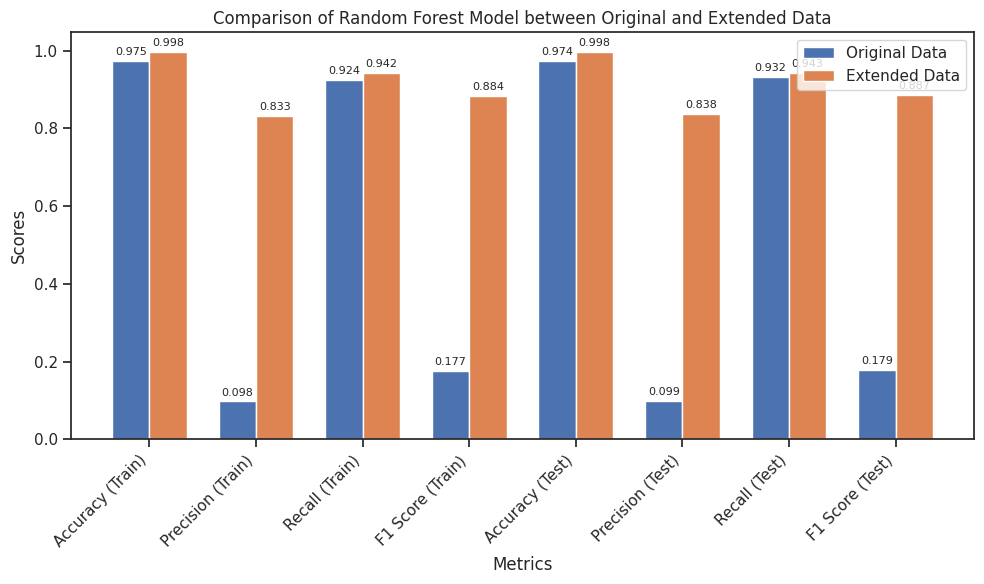

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train, precision_train, recall_train, f1_train,
                    accuracy_test, precision_test, recall_test, f1_test]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_syn, precision_train_syn, recall_train_syn, f1_train_syn,
                     accuracy_test_syn, precision_test_syn, recall_test_syn, f1_test_syn]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest Model between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


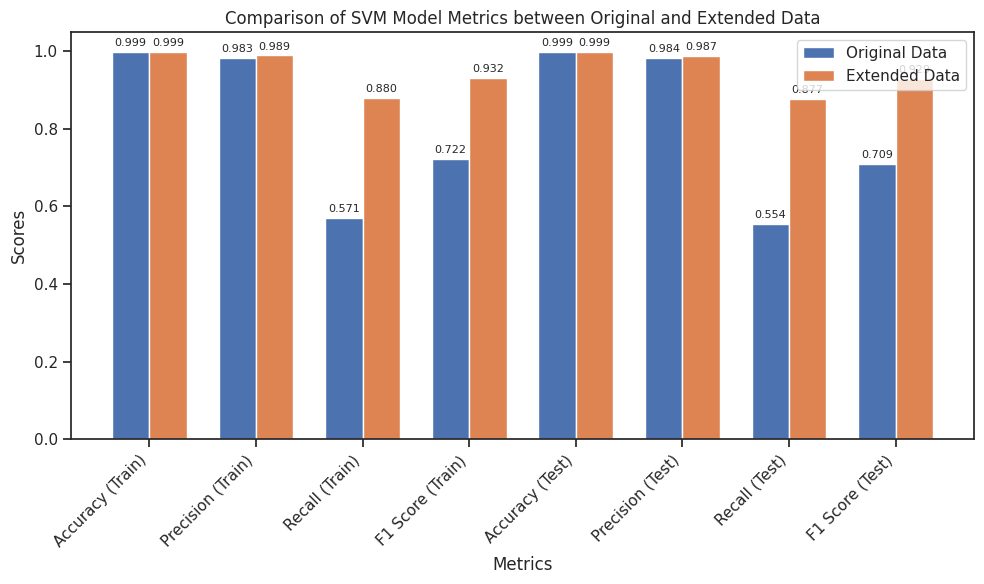

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train_svm, precision_train_svm, recall_train_svm, f1_train_svm,
                    accuracy_test_svm, precision_test_svm, recall_test_svm, f1_test_svm]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_svm_syn, precision_train_svm_syn, recall_train_svm_syn, f1_train_svm_syn,
                     accuracy_test_svm_syn, precision_test_svm_syn, recall_test_svm_syn, f1_test_svm_syn]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM Model Metrics between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


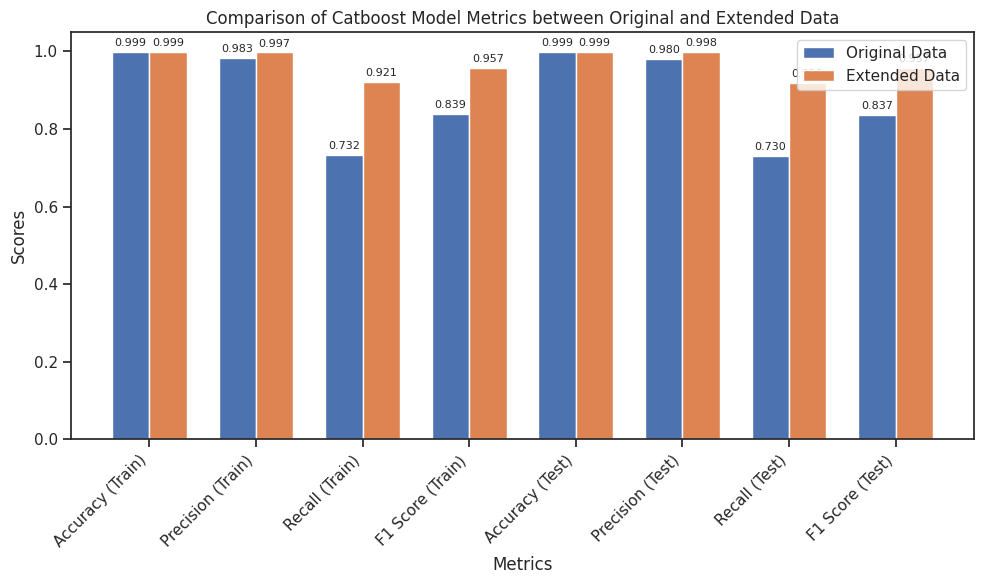

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train_catboost, precision_train_catboost, recall_train_catboost, f1_train_catboost,
                    accuracy_test_catboost, precision_test_catboost, recall_test_catboost, f1_test_catboost]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_catboost_syn, precision_train_catboost_syn, recall_train_catboost_syn, f1_train_catboost_syn,
                     accuracy_test_catboost_syn, precision_test_catboost_syn, recall_test_catboost_syn, f1_test_catboost_syn]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Catboost Model Metrics between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Confusion matrix for machine learning models**

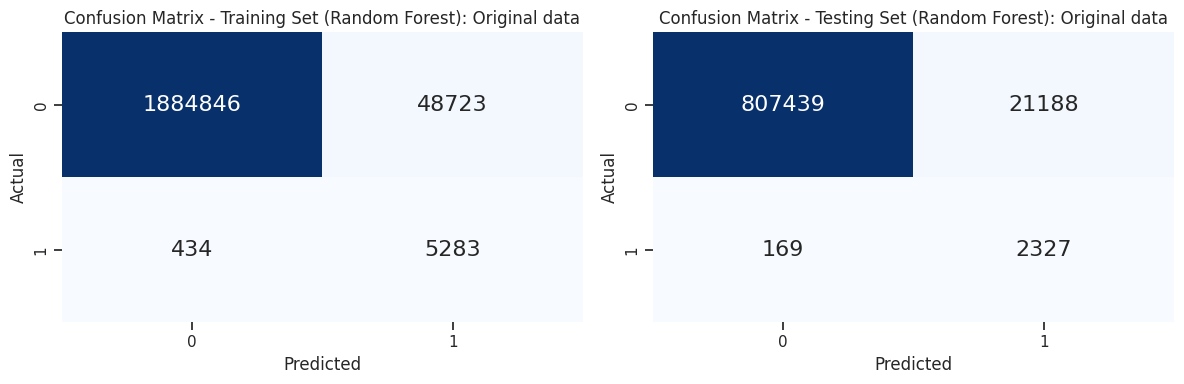

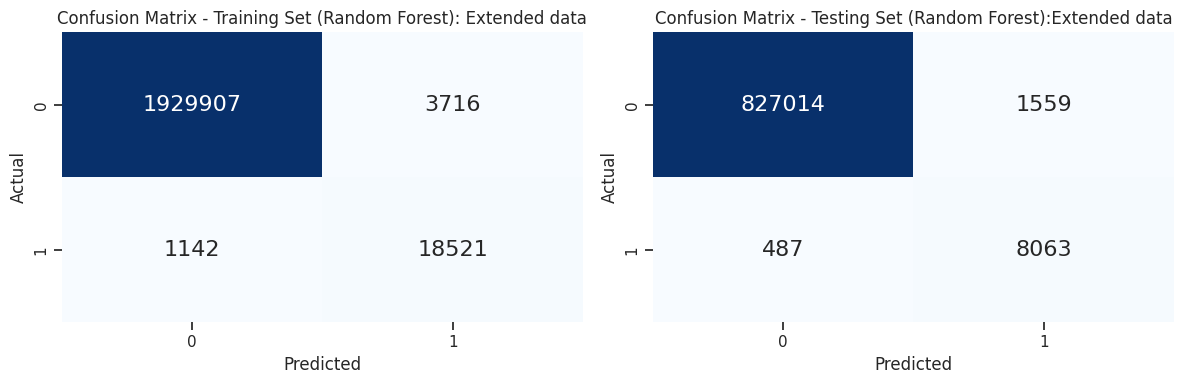

In [ ]:
# Confusion matrix for training set - Original data
cm_train_random = confusion_matrix(y_train_original, y_train_pred_random)

# Confusion matrix for testing set - Original data
cm_test_random = confusion_matrix(y_test_original, y_test_pred_random)

# Confusion matrix for training set - Synthetic data
cm_train_random_syn = confusion_matrix(B_train_original, B_train_pred_ran_syn)

# Confusion matrix for testing set - Synthetic data
cm_test_random_syn = confusion_matrix(B_test_original, B_test_pred_ran_syn)

# Plot confusion matrix for training set - Original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_random, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (Random Forest): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Original data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_random, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (Random Forest): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot confusion matrix for training set - Synthetic data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_random_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (Random Forest): Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Synthetic data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_random_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (Random Forest):Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


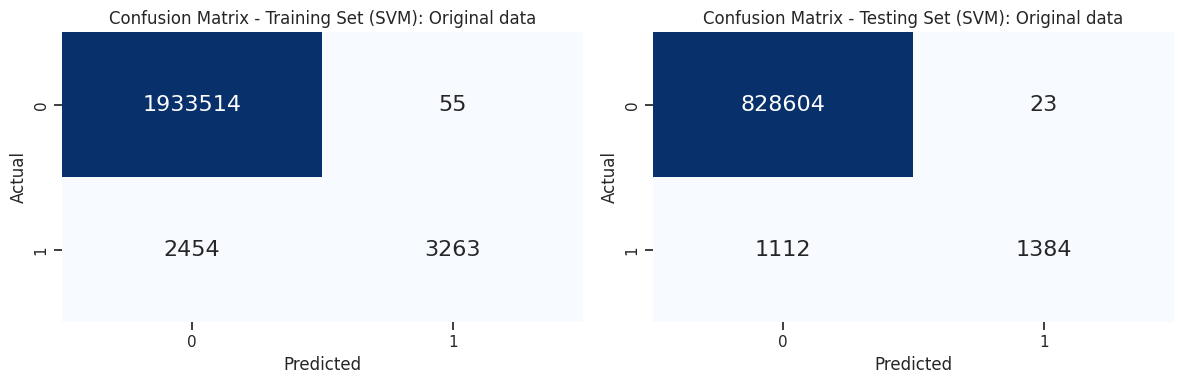

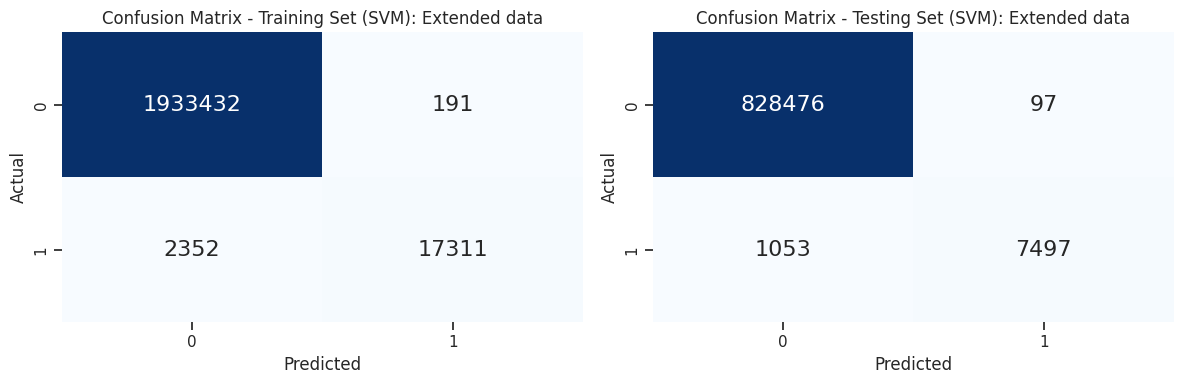

In [ ]:
# Confusion matrix for training set - Original data
cm_train_svm = confusion_matrix(y_train_original, y_train_pred_svm)

# Confusion matrix for testing set - Original data
cm_test_svm = confusion_matrix(y_test_original, y_test_pred_svm)

# Confusion matrix for training set - Synthetic data
cm_train_svm_syn = confusion_matrix(B_train_original, B_train_pred_svm)

# Confusion matrix for testing set - Synthetic data
cm_test_svm_syn = confusion_matrix(B_test_original, B_test_pred_svm)

# Plot confusion matrix for training set - Original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (SVM): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Original data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (SVM): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot confusion matrix for training set - Synthetic data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (SVM): Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Synthetic data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (SVM): Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


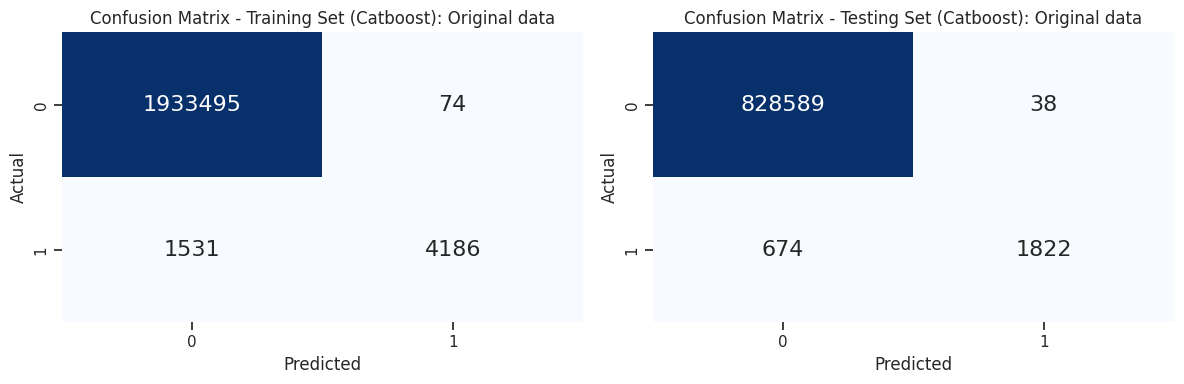

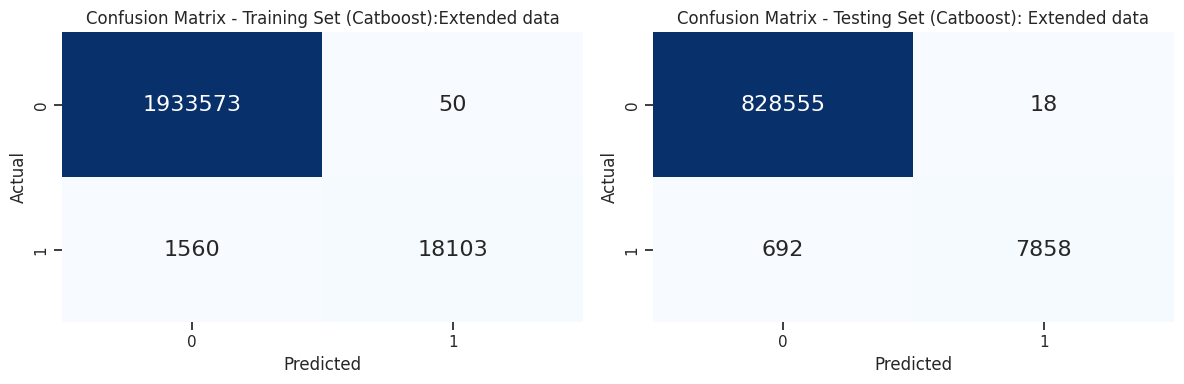

In [ ]:
# Confusion matrix for training set - Original data
cm_train_svm = confusion_matrix(y_train_original, y_train_pred_catboost)

# Confusion matrix for testing set - Original data
cm_test_svm = confusion_matrix(y_test_original, y_test_pred_catboost)

# Confusion matrix for training set - Synthetic data
cm_train_svm_syn = confusion_matrix(B_train_original, B_train_pred_catboost)

# Confusion matrix for testing set - Synthetic data
cm_test_svm_syn = confusion_matrix(B_test_original, B_test_pred_catboost)

# Plot confusion matrix for training set - Original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (Catboost): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Original data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (Catboost): Original data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot confusion matrix for training set - Synthetic data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_svm_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Training Set (Catboost):Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for testing set - Synthetic data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_svm_syn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.title('Confusion Matrix - Testing Set (Catboost): Extended data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**ROC-AUC Curve for machine learning models**

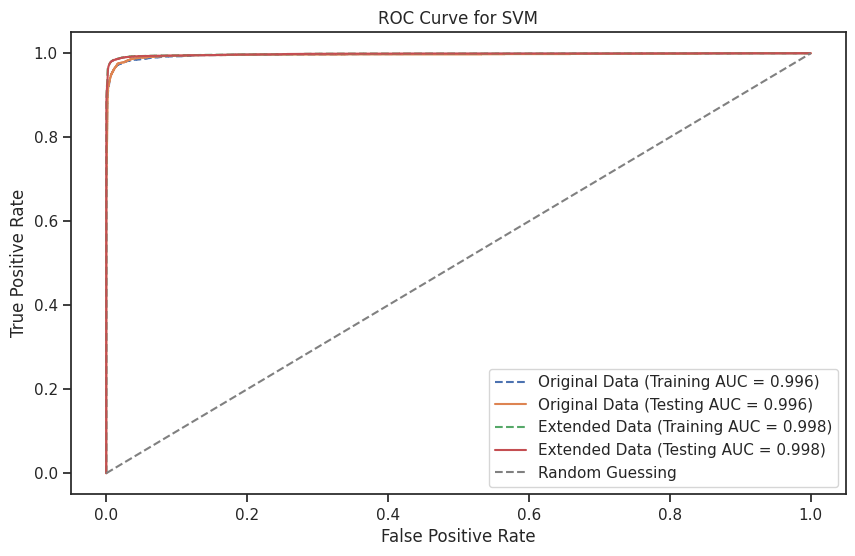

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC and plot ROC curve for the original dataset
y_scores_train_svm = model_svm.decision_function(X_train_original)
y_scores_test_svm = model_svm.decision_function(X_test_original)

roc_auc_train_svm = roc_auc_score(y_train_original, y_scores_train_svm)
roc_auc_test_svm = roc_auc_score(y_test_original, y_scores_test_svm)

fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train_original, y_scores_train_svm)
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test_original, y_scores_test_svm)

# Calculate ROC AUC and plot ROC curve for the synthetic dataset
y_scores_train_svm_syn = model_svm_syn.decision_function(A_train_original)
y_scores_test_svm_syn = model_svm_syn.decision_function(A_test_original)

roc_auc_train_svm_syn = roc_auc_score(B_train_original, y_scores_train_svm_syn)
roc_auc_test_svm_syn = roc_auc_score(B_test_original, y_scores_test_svm_syn)

fpr_train_svm_syn, tpr_train_svm_syn, _ = roc_curve(B_train_original, y_scores_train_svm_syn)
fpr_test_svm_syn, tpr_test_svm_syn, _ = roc_curve(B_test_original, y_scores_test_svm_syn)

# Plot ROC curves for both datasets (Training and Testing)
plt.figure(figsize=(10, 6))

# Original Data - Training Set
plt.plot(fpr_train_svm, tpr_train_svm, label=f'Original Data (Training AUC = {roc_auc_train_svm:.3f})', linestyle='--')

# Original Data - Testing Set
plt.plot(fpr_test_svm, tpr_test_svm, label=f'Original Data (Testing AUC = {roc_auc_test_svm:.3f})')

# Synthetic Data - Training Set
plt.plot(fpr_train_svm_syn, tpr_train_svm_syn, label=f'Extended Data (Training AUC = {roc_auc_train_svm_syn:.3f})', linestyle='--')

# Synthetic Data - Testing Set
plt.plot(fpr_test_svm_syn, tpr_test_svm_syn, label=f'Extended Data (Testing AUC = {roc_auc_test_svm_syn:.3f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


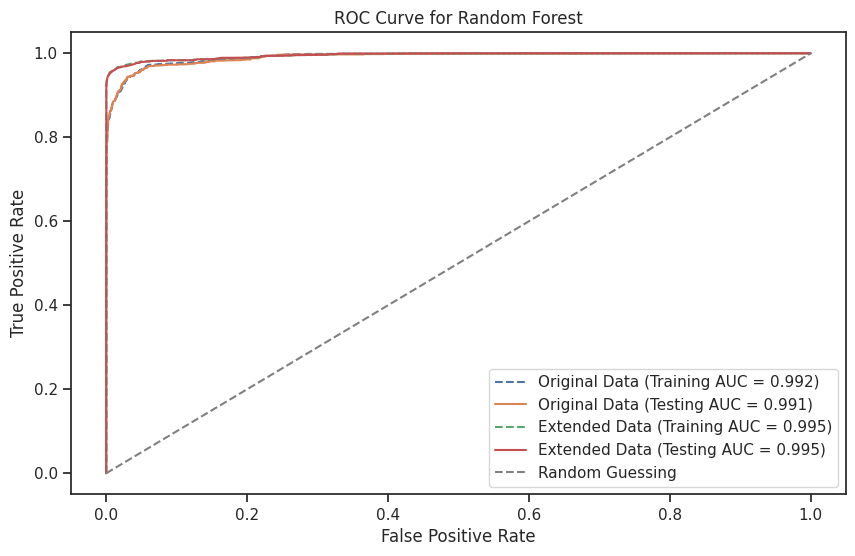

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC and plot ROC curve for the original dataset
y_scores_train_random = model_rf.predict_proba(X_train_original)[:, 1]
y_scores_test_random = model_rf.predict_proba(X_test_original)[:, 1]

roc_auc_train_random = roc_auc_score(y_train_original, y_scores_train_random)
roc_auc_test_random = roc_auc_score(y_test_original, y_scores_test_random)

fpr_train_random, tpr_train_random, _ = roc_curve(y_train_original, y_scores_train_random)
fpr_test_random, tpr_test_random, _ = roc_curve(y_test_original, y_scores_test_random)

# Calculate ROC AUC and plot ROC curve for the synthetic dataset
y_scores_train_random_syn = model_rf_syn.predict_proba(A_train_original)[:, 1]
y_scores_test_random_syn = model_rf_syn.predict_proba(A_test_original)[:, 1]

roc_auc_train_random_syn = roc_auc_score(B_train_original, y_scores_train_random_syn)
roc_auc_test_random_syn = roc_auc_score(B_test_original, y_scores_test_random_syn)

fpr_train_random_syn, tpr_train_random_syn, _ = roc_curve(B_train_original, y_scores_train_random_syn)
fpr_test_random_syn, tpr_test_random_syn, _ = roc_curve(B_test_original, y_scores_test_random_syn)

# Plot ROC curves for both datasets (Training and Testing)
plt.figure(figsize=(10, 6))

# Original Data - Training Set
plt.plot(fpr_train_random, tpr_train_random, label=f'Original Data (Training AUC = {roc_auc_train_random:.3f})', linestyle='--')

# Original Data - Testing Set
plt.plot(fpr_test_random, tpr_test_random, label=f'Original Data (Testing AUC = {roc_auc_test_random:.3f})')

# Synthetic Data - Training Set
plt.plot(fpr_train_random_syn, tpr_train_random_syn, label=f'Extended Data (Training AUC = {roc_auc_train_random_syn:.3f})', linestyle='--')

# Synthetic Data - Testing Set
plt.plot(fpr_test_random_syn, tpr_test_random_syn, label=f'Extended Data (Testing AUC = {roc_auc_test_random_syn:.3f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


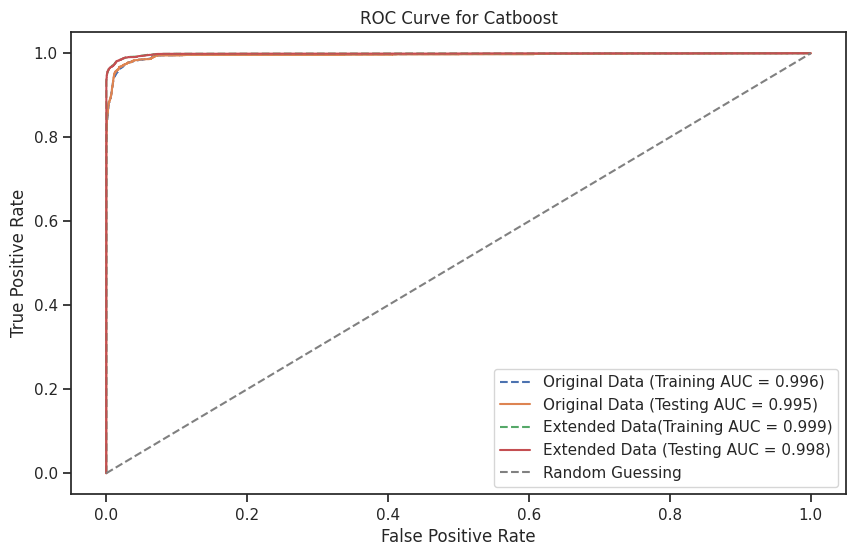

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC and plot ROC curve for the original dataset
y_scores_train_catboost = model_catboost.predict_proba(X_train_original)[:, 1]
y_scores_test_catboost = model_catboost.predict_proba(X_test_original)[:, 1]

roc_auc_train_catboost = roc_auc_score(y_train_original, y_scores_train_catboost)
roc_auc_test_catboost = roc_auc_score(y_test_original, y_scores_test_catboost)

fpr_train_catboost, tpr_train_catboost, _ = roc_curve(y_train_original, y_scores_train_catboost)
fpr_test_catboost, tpr_test_catboost, _ = roc_curve(y_test_original, y_scores_test_catboost)

# Calculate ROC AUC and plot ROC curve for the synthetic dataset
y_scores_train_catboost_syn = model_catboost_syn.predict_proba(A_train_original)[:, 1]
y_scores_test_catboost_syn = model_catboost_syn.predict_proba(A_test_original)[:, 1]

roc_auc_train_catboost_syn = roc_auc_score(B_train_original, y_scores_train_catboost_syn)
roc_auc_test_catboost_syn = roc_auc_score(B_test_original, y_scores_test_catboost_syn)

fpr_train_catboost_syn, tpr_train_catboost_syn, _ = roc_curve(B_train_original, y_scores_train_catboost_syn)
fpr_test_catboost_syn, tpr_test_catboost_syn, _ = roc_curve(B_test_original, y_scores_test_catboost_syn)

# Plot ROC curves for both datasets (Training and Testing)
plt.figure(figsize=(10, 6))

# Original Data - Training Set
plt.plot(fpr_train_catboost, tpr_train_catboost, label=f'Original Data (Training AUC = {roc_auc_train_catboost:.3f})', linestyle='--')

# Original Data - Testing Set
plt.plot(fpr_test_catboost, tpr_test_catboost, label=f'Original Data (Testing AUC = {roc_auc_test_catboost:.3f})')

# Synthetic Data - Training Set
plt.plot(fpr_train_catboost_syn, tpr_train_catboost_syn, label=f'Extended Data(Training AUC = {roc_auc_train_catboost_syn:.3f})', linestyle='--')

# Synthetic Data - Testing Set
plt.plot(fpr_test_catboost_syn, tpr_test_catboost_syn, label=f'Extended Data (Testing AUC = {roc_auc_test_catboost_syn:.3f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curve for Catboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Deep learning Models

**CNN FOR ORIGINAL DATA**

In [ ]:
# Reshape the input data for CNN
X_train_cnn_syn = X_train_original.values.reshape(X_train_original.shape[0], X_train_original.shape[1], 1)
X_test_cnn_syn = X_test_original.values.reshape(X_test_original.shape[0], X_test_original.shape[1], 1)

# Define the number of folds for cross-validation
n_splits_cnn_syn = 5
skf = StratifiedKFold(n_splits=n_splits_cnn_syn, shuffle=True, random_state=42)

# Lists to store metric results for each fold
accuracy_list_CNN_syn = []
recall_list_CNN_syn = []
precision_list_CNN_syn = []
f1_list_CNN_syn = []

# Build the CNN model
model_cnn_syn = models.Sequential()
model_cnn_syn.add(layers.Conv1D(16, 3, activation='relu', input_shape=(X_train_cnn_syn.shape[1], 1)))
model_cnn_syn.add(layers.MaxPooling1D(2))
model_cnn_syn.add(layers.Conv1D(32, 3, activation='relu', padding='same'))
model_cnn_syn.add(layers.MaxPooling1D(2))
model_cnn_syn.add(layers.Conv1D(64, 3, activation='relu', padding='same'))
model_cnn_syn.add(layers.Flatten())
model_cnn_syn.add(layers.Dense(64, activation='relu'))
model_cnn_syn.add(layers.Dropout(0.6))
model_cnn_syn.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model_cnn_syn.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform cross-validation
for train_index, val_index in skf.split(X_train_cnn_syn, y_train_original):
    X_train_fold, X_val_fold = X_train_cnn_syn[train_index], X_train_cnn_syn[val_index]
    y_train_fold, y_val_fold = y_train_original.iloc[train_index], y_train_original.iloc[val_index]

    # Train the model for the current fold with early stopping
    history = model_cnn_syn.fit(X_train_fold, y_train_fold, epochs=100, batch_size=128, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluate the model on the validation data
    val_pred_prob_cnn_syn = model_cnn_syn.predict(X_val_fold)
    val_pred_cnn_syn = (val_pred_prob_cnn_syn > 0.5).astype(int)

    # Calculate metrics for the current fold
    accuracy_fold_CNN = accuracy_score(y_val_fold, val_pred_cnn_syn)
    recall_fold_CNN = recall_score(y_val_fold, val_pred_cnn_syn)
    precision_fold_CNN = precision_score(y_val_fold, val_pred_cnn_syn)
    f1_fold_CNN = f1_score(y_val_fold, val_pred_cnn_syn)

    # Append metrics to the lists
    accuracy_list_CNN_syn.append(accuracy_fold_CNN)
    recall_list_CNN_syn.append(recall_fold_CNN)
    precision_list_CNN_syn.append(precision_fold_CNN)
    f1_list_CNN_syn.append(f1_fold_CNN)

# Evaluate the model on the testing data
test_pred_prob_syn = model_cnn_syn.predict(X_test_cnn_syn)
test_pred_syn = (test_pred_prob_syn > 0.5).astype(int)
accuracy_CNN_test_syn = accuracy_score(y_test_original, test_pred_syn)
recall_CNN_test_syn = recall_score(y_test_original, test_pred_syn)
precision_CNN_test_syn = precision_score(y_test_original, test_pred_syn)
f1_CNN_test_syn = f1_score(y_test_original, test_pred_syn)

# Evaluate the model on the training data
train_pred_prob_syn = model_cnn_syn.predict(X_train_cnn_syn)
train_pred_syn = (train_pred_prob_syn > 0.5).astype(int)

accuracy_train_CNN_syn = accuracy_score(y_train_original, train_pred_syn)
recall_train_CNN_syn = recall_score(y_train_original, train_pred_syn)
precision_train_CNN_syn = precision_score(y_train_original, train_pred_syn)
f1_train_CNN_syn = f1_score(y_train_original, train_pred_syn)

print("\nTraining Metrics: CNN Original Data")
print(f"Training Accuracy: {accuracy_train_CNN_syn}")
print(f"Training Recall: {recall_train_CNN_syn}")
print(f"Training Precision: {precision_train_CNN_syn}")
print(f"Training F1 Score: {f1_train_CNN_syn}")

print("\nTesting Metrics:CNN  Original Data")
print(f"Testing Accuracy: {accuracy_CNN_test_syn}")
print(f"Testing Recall: {recall_CNN_test_syn}")
print(f"Testing Precision: {precision_CNN_test_syn}")
print(f"Testing F1 Score: {f1_CNN_test_syn}")

# Print average metrics over all folds
print(f"\nCross-Validation Metrics: CNN Original Data")
print(f"Accuracy: {np.mean(accuracy_list_CNN_syn)}")
print(f"Recall: {np.mean(recall_list_CNN_syn)}")
print(f"Precision: {np.mean(precision_list_CNN_syn)}")
print(f"F1 Score: {np.mean(f1_list_CNN_syn)}")



Epoch 1/100
12121/12121 [==============================] - 74s 6ms/step - loss: 0.0278 - accuracy: 0.9976 - val_loss: 0.0119 - val_accuracy: 0.9982
Epoch 2/100
12121/12121 [==============================] - 71s 6ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0085 - val_accuracy: 0.9982
Epoch 3/100
12121/12121 [==============================] - 71s 6ms/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 0.0074 - val_accuracy: 0.9984
Epoch 4/100
12121/12121 [==============================] - 69s 6ms/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0075 - val_accuracy: 0.9984
Epoch 5/100
12121/12121 [==============================] - 71s 6ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9984
Epoch 6/100
12121/12121 [==============================] - 67s 6ms/step - loss: 0.0090 - accuracy: 0.9984 - val_loss: 0.0069 - val_accuracy: 0.9985
Epoch 7/100
12121/12121 [==============================] - 70s 6ms/step - loss: 0.0095 - accuracy: 0.9984 - val_

**CNN FOR EXTENDED DATA**

In [ ]:
# Reshape the input data for CNN for original data
A_train_cnn = A_train_original.values.reshape(A_train_original.shape[0], A_train_original.shape[1], 1)
A_test_cnn = A_test_original.values.reshape(A_test_original.shape[0], A_test_original.shape[1], 1)

# Define the number of folds for cross-validation
n_splits_cnn = 5
skf = StratifiedKFold(n_splits=n_splits_cnn, shuffle=True, random_state=42)

# Lists to store metric results for each fold
accuracy_list_CNN = []
recall_list_CNN = []
precision_list_CNN = []
f1_list_CNN = []

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv1D(16, 3, activation='relu', input_shape=(A_train_cnn.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(32, 3, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform cross-validation
for train_index, val_index in skf.split(A_train_cnn, B_train_original):
    A_train_fold, A_val_fold = A_train_cnn[train_index], A_train_cnn[val_index]
    B_train_fold, B_val_fold = B_train_original.iloc[train_index], B_train_original.iloc[val_index]

    # Train the model for the current fold with early stopping
    history = model.fit(A_train_fold, B_train_fold, epochs=100, batch_size=128, validation_data=(A_val_fold, B_val_fold), callbacks=[early_stopping])

    # Evaluate the model on the validation data
    val_pred_prob_cnn = model.predict(A_val_fold)
    val_pred_cnn = (val_pred_prob_cnn > 0.5).astype(int)

    # Calculate metrics for the current fold
    accuracy_fold = accuracy_score(B_val_fold, val_pred_cnn)
    recall_fold = recall_score(B_val_fold, val_pred_cnn)
    precision_fold = precision_score(B_val_fold, val_pred_cnn)
    f1_fold = f1_score(B_val_fold, val_pred_cnn)

    # Append metrics to the lists
    accuracy_list_CNN.append(accuracy_fold)
    recall_list_CNN.append(recall_fold)
    precision_list_CNN.append(precision_fold)
    f1_list_CNN.append(f1_fold)


# Evaluate the model on the testing data
test_pred_prob = model.predict(A_test_cnn)
test_pred = (test_pred_prob > 0.5).astype(int)
accuracy_original_CNN = accuracy_score(B_test_original, test_pred)
recall_original_CNN = recall_score(B_test_original, test_pred)
precision_original_CNN = precision_score(B_test_original, test_pred)
f1_original_CNN = f1_score(B_test_original, test_pred)

# Evaluate the model on the training data
train_pred_prob = model.predict(A_train_cnn)
train_pred = (train_pred_prob > 0.5).astype(int)

accuracy_train_CNN = accuracy_score(B_train_original, train_pred)
recall_train_CNN = recall_score(B_train_original, train_pred)
precision_train_CNN = precision_score(B_train_original, train_pred)
f1_train_CNN = f1_score(B_train_original, train_pred)

print("\nTraining Metrics: CNN Extended Data")
print(f"Training Accuracy: {accuracy_train_CNN}")
print(f"Training Recall: {recall_train_CNN}")
print(f"Training Precision: {precision_train_CNN}")
print(f"Training F1 Score: {f1_train_CNN}")

print("\nTesting Metrics: CNN Extended Data")
print(f"Testing Accuracy: {accuracy_original_CNN}")
print(f"Testing Recall: {recall_original_CNN}")
print(f"Testing Precision: {precision_original_CNN}")
print(f"Testing F1 Score: {f1_original_CNN}")

# Print average metrics over all folds
print(f"\nCross-Validation Metrics: CNN Extended Data")
print(f"Accuracy: {np.mean(accuracy_list_CNN)}")
print(f"Recall: {np.mean(recall_list_CNN)}")
print(f"Precision: {np.mean(precision_list_CNN)}")
print(f"F1 Score: {np.mean(f1_list_CNN)}")



Epoch 1/100
12209/12209 [==============================] - 78s 6ms/step - loss: 0.0452 - accuracy: 0.9951 - val_loss: 0.0216 - val_accuracy: 0.9984
Epoch 2/100
12209/12209 [==============================] - 71s 6ms/step - loss: 0.0178 - accuracy: 0.9982 - val_loss: 0.0099 - val_accuracy: 0.9984
Epoch 3/100
12209/12209 [==============================] - 76s 6ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.0133 - val_accuracy: 0.9985
Epoch 4/100
12209/12209 [==============================] - 75s 6ms/step - loss: 0.0143 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9986
Epoch 5/100
12209/12209 [==============================] - 71s 6ms/step - loss: 0.0164 - accuracy: 0.9983 - val_loss: 0.0153 - val_accuracy: 0.9986
Epoch 6/100
12209/12209 [==============================] - 76s 6ms/step - loss: 0.0129 - accuracy: 0.9984 - val_loss: 0.0096 - val_accuracy: 0.9986
Epoch 7/100
12209/12209 [==============================] - 71s 6ms/step - loss: 0.0105 - accuracy: 0.9984 - val_

**LSTM FOR ORIGINAL DATA**

In [ ]:
# Reshape the data for LSTM for Original data
X_train_lstm_syn = X_train_original.values.reshape(X_train_original.shape[0], 1, X_train_original.shape[1])
X_test_lstm_syn = X_test_original.values.reshape(X_test_original.shape[0], 1, X_test_original.shape[1])

# Build the LSTM model
model_lstm_syn = keras.Sequential()
model_lstm_syn.add(layers.LSTM(64, input_shape=(1, X_train_original.shape[1]), activation='relu'))
model_lstm_syn.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model_lstm_syn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_lstm_syn.fit(X_train_lstm_syn, y_train_original, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing data
test_pred_prob_lstm_syn = model_lstm_syn.predict(X_test_lstm_syn)
test_pred_lstm_syn = np.round(test_pred_prob_lstm_syn)
accuracy_test_LSTM_syn = accuracy_score(y_test_original, test_pred_lstm_syn)
recall_test_LSTM_syn = recall_score(y_test_original, test_pred_lstm_syn)
precision_test_LSTM_syn = precision_score(y_test_original, test_pred_lstm_syn)
f1_test_LSTM_syn = f1_score(y_test_original, test_pred_lstm_syn)

# Cross-validation
n_splits_lstm_syn = 5
skf = StratifiedKFold(n_splits=n_splits_lstm_syn, shuffle=True, random_state=42)

# Lists to store metric results for each fold
accuracy_list_LSTM_syn = []
recall_list_LSTM_syn = []
precision_list_LSTM_syn = []
f1_list_LSTM_syn = []

for train_index, val_index in skf.split(X_scaled, y):
    X_train_fold, X_val_fold = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    X_train_fold_lstm = X_train_fold.values.reshape(X_train_fold.shape[0], 1, X_train_fold.shape[1])

    model_cv_lstm = keras.Sequential()
    model_cv_lstm.add(layers.LSTM(64, input_shape=(1, X_train_fold.shape[1]), activation='relu'))
    model_cv_lstm.add(layers.Dense(1, activation='sigmoid'))
    model_cv_lstm.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    history_cv = model_cv_lstm.fit(X_train_fold_lstm, y_train_fold, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

    val_pred_prob_lstm_syn = model_cv_lstm.predict(X_val_fold.values.reshape(X_val_fold.shape[0], 1, X_val_fold.shape[1]))
    val_pred_lstm_syn = np.round(val_pred_prob_lstm_syn)

    accuracy_fold = accuracy_score(y_val_fold, val_pred_lstm_syn)
    recall_fold = recall_score(y_val_fold, val_pred_lstm_syn)
    precision_fold = precision_score(y_val_fold, val_pred_lstm_syn)
    f1_fold = f1_score(y_val_fold, val_pred_lstm_syn)

    accuracy_list_LSTM_syn.append(accuracy_fold)
    recall_list_LSTM_syn.append(recall_fold)
    precision_list_LSTM_syn.append(precision_fold)
    f1_list_LSTM_syn.append(f1_fold)

# Evaluate the model on the training data
train_pred_prob_lstm_syn = model_lstm_syn.predict(X_train_lstm_syn)
train_pred_lstm_syn = np.round(train_pred_prob_lstm_syn)
accuracy_train_LSTM_syn = accuracy_score(y_train_original, train_pred_lstm_syn)
recall_train_LSTM_syn = recall_score(y_train_original, train_pred_lstm_syn)
precision_train_LSTM_syn = precision_score(y_train_original, train_pred_lstm_syn)
f1_train_LSTM_syn = f1_score(y_train_original, train_pred_lstm_syn)
# Print average metrics over all folds

print(f"\nMetrics Evaluation for LSTM Model: Original Data")
print(f"\n Cross-Validation Metrics: Original Data")
print(f"Accuracy: {np.mean(accuracy_list_LSTM_syn)}")
print(f"Recall: {np.mean(recall_list_LSTM_syn)}")
print(f"Precision: {np.mean(precision_list_LSTM_syn)}")
print(f"F1 Score: {np.mean(f1_list_LSTM_syn)}")

print("Testing Metrics: Original Data")
print(f"Testing Accuracy: {accuracy_test_LSTM_syn}")
print(f"Testing Recall: {recall_test_LSTM_syn}")
print(f"Testing Precision: {precision_test_LSTM_syn}")
print(f"Testing F1 Score: {f1_test_LSTM_syn}")

print("\nTraining Metrics: Original Data")
print(f"Training Accuracy: {accuracy_train_LSTM_syn}")
print(f"Training Recall: {recall_train_LSTM_syn}")
print(f"Training Precision: {precision_train_LSTM_syn}")
print(f"Training F1 Score: {f1_train_LSTM_syn}")

Epoch 1/100
12121/12121 [==============================] - 95s 8ms/step - loss: 0.0278 - accuracy: 0.9982 - val_loss: 0.0216 - val_accuracy: 0.9985
Epoch 2/100
12121/12121 [==============================] - 82s 7ms/step - loss: 0.0161 - accuracy: 0.9986 - val_loss: 0.0160 - val_accuracy: 0.9987
Epoch 3/100
12121/12121 [==============================] - 86s 7ms/step - loss: 0.0200 - accuracy: 0.9988 - val_loss: 0.0214 - val_accuracy: 0.9987
Epoch 4/100
12121/12121 [==============================] - 81s 7ms/step - loss: 0.0319 - accuracy: 0.9988 - val_loss: 0.0377 - val_accuracy: 0.9989
Epoch 5/100
12121/12121 [==============================] - 85s 7ms/step - loss: 0.0352 - accuracy: 0.9989 - val_loss: 0.0394 - val_accuracy: 0.9989
Epoch 6/100
12121/12121 [==============================] - 82s 7ms/step - loss: 0.0410 - accuracy: 0.9989 - val_loss: 0.0421 - val_accuracy: 0.9990
Epoch 7/100
25973/25973 [==============================] - 59s 2ms/step


Epoch 1/100
13853/13853 [==============================] - 97s 7ms/step - loss: 0.0170 - accuracy: 0.9988 - val_loss: 0.1526 - val_accuracy: 0.9949
Epoch 2/100
13853/13853 [==============================] - 93s 7ms/step - loss: 0.0134 - accuracy: 0.9991 - val_loss: 0.2120 - val_accuracy: 0.9953
Epoch 3/100
13853/13853 [==============================] - 91s 7ms/step - loss: 0.0174 - accuracy: 0.9991 - val_loss: 0.3713 - val_accuracy: 0.9953
Epoch 4/100
13853/13853 [==============================] - 92s 7ms/step - loss: 0.0259 - accuracy: 0.9992 - val_loss: 0.4944 - val_accuracy: 0.9951
Epoch 5/100
13853/13853 [==============================] - 93s 7ms/step - loss: 0.0330 - accuracy: 0.9992 - val_loss: 0.5478 - val_accuracy: 0.9960
Epoch 6/100
17316/17316 [==============================] - 40s 2ms/step


Epoch 1/100
13853/13853 [==============================] - 99s 7ms/step - loss: 0.0190 - accuracy: 0.9988 - val_loss: 0.2115 - val_accuracy: 0.9948
Epoch 2/100
13853/13853 [==============================] - 98s 7ms/step - loss: 0.0194 - accuracy: 0.9990 - val_loss: 0.3014 - val_accuracy: 0.9956
Epoch 3/100
13853/13853 [==============================] - 95s 7ms/step - loss: 0.0260 - accuracy: 0.9991 - val_loss: 0.4373 - val_accuracy: 0.9958
Epoch 4/100
13853/13853 [==============================] - 93s 7ms/step - loss: 0.0318 - accuracy: 0.9992 - val_loss: 0.5509 - val_accuracy: 0.9955
Epoch 5/100
13853/13853 [==============================] - 96s 7ms/step - loss: 0.0386 - accuracy: 0.9992 - val_loss: 0.5925 - val_accuracy: 0.9961
Epoch 6/100
17316/17316 [==============================] - 41s 2ms/step


Epoch 1/100
13853/13853 [==============================] - 98s 7ms/step - loss: 0.0174 - accuracy: 0.9988 - val_loss: 0.1354 - val_accuracy: 0.9953
Epoch 2/100
13853/13853 [==============================] - 94s 7ms/step - loss: 0.0143 - accuracy: 0.9990 - val_loss: 0.2853 - val_accuracy: 0.9954
Epoch 3/100
13853/13853 [==============================] - 93s 7ms/step - loss: 0.0224 - accuracy: 0.9991 - val_loss: 0.4029 - val_accuracy: 0.9958
Epoch 4/100
13853/13853 [==============================] - 95s 7ms/step - loss: 0.0291 - accuracy: 0.9992 - val_loss: 0.4976 - val_accuracy: 0.9957
Epoch 5/100
13853/13853 [==============================] - 93s 7ms/step - loss: 0.0333 - accuracy: 0.9992 - val_loss: 0.5669 - val_accuracy: 0.9957
Epoch 6/100
17316/17316 [==============================] - 39s 2ms/step


Epoch 1/100
13853/13853 [==============================] - 99s 7ms/step - loss: 0.0177 - accuracy: 0.9987 - val_loss: 0.1285 - val_accuracy: 0.9954
Epoch 2/100
13853/13853 [==============================] - 96s 7ms/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 0.2223 - val_accuracy: 0.9957
Epoch 3/100
13853/13853 [==============================] - 95s 7ms/step - loss: 0.0217 - accuracy: 0.9991 - val_loss: 0.3853 - val_accuracy: 0.9955
Epoch 4/100
13853/13853 [==============================] - 96s 7ms/step - loss: 0.0321 - accuracy: 0.9992 - val_loss: 0.4882 - val_accuracy: 0.9958
Epoch 5/100
13853/13853 [==============================] - 95s 7ms/step - loss: 0.0340 - accuracy: 0.9992 - val_loss: 0.5791 - val_accuracy: 0.9958
Epoch 6/100
17316/17316 [==============================] - 39s 2ms/step


Epoch 1/100
13853/13853 [==============================] - 98s 7ms/step - loss: 0.0177 - accuracy: 0.9988 - val_loss: 0.1802 - val_accuracy: 0.9949
Epoch 2/100
13853/13853 [==============================] - 97s 7ms/step - loss: 0.0172 - accuracy: 0.9990 - val_loss: 0.3049 - val_accuracy: 0.9954
Epoch 3/100
13853/13853 [==============================] - 95s 7ms/step - loss: 0.0262 - accuracy: 0.9991 - val_loss: 0.4454 - val_accuracy: 0.9951
Epoch 4/100
13853/13853 [==============================] - 98s 7ms/step - loss: 0.0349 - accuracy: 0.9992 - val_loss: 0.5599 - val_accuracy: 0.9954
Epoch 5/100
13853/13853 [==============================] - 100s 7ms/step - loss: 0.0420 - accuracy: 0.9992 - val_loss: 0.6313 - val_accuracy: 0.9957
Epoch 6/100
60603/60603 [==============================] - 145s 2ms/step

Metrics Evaluation for LSTM Model: Original Data

 Cross-Validation Metrics: Original Data
Accuracy: 0.9981804130779233
Recall: 0.3936452065122548
Precision: 0.9815277123212907
F1 Score

**LSTM FOR EXTENDED DATA**

In [ ]:
# Reshape the data for LSTM for Extended data
A_train = A_train_original.values.reshape(A_train_original.shape[0], 1, A_train_original.shape[1])
A_test = A_test_original.values.reshape(A_test_original.shape[0], 1, A_test_original.shape[1])

# Build the LSTM model
model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(64, input_shape=(1, A_train_original.shape[1]), activation='relu'))
model_lstm.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_lstm.fit(A_train, B_train_original, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing data
test_pred_prob_lstm = model_lstm.predict(A_test)
test_pred_lstm = np.round(test_pred_prob_lstm)
accuracy_test_LSTM = accuracy_score(B_test_original, test_pred_lstm)
recall_test_LSTM = recall_score(B_test_original, test_pred_lstm)
precision_test_LSTM = precision_score(B_test_original, test_pred_lstm)
f1_test_LSTM = f1_score(B_test_original, test_pred_lstm)

# Cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metric results for each fold
accuracy_list_LSTM = []
recall_list_LSTM = []
precision_list_LSTM = []
f1_list_LSTM = []

for train_index, val_index in skf.split(A_scaled, B):
    A_train_fold, A_val_fold = A_scaled.iloc[train_index], A_scaled.iloc[val_index]
    B_train_fold, B_val_fold = B.iloc[train_index], B.iloc[val_index]

    A_train_fold_lstm = A_train_fold.values.reshape(A_train_fold.shape[0], 1, A_train_fold.shape[1])

    model_cv = keras.Sequential()
    model_cv.add(layers.LSTM(64, input_shape=(1, A_train_fold.shape[1]), activation='relu'))
    model_cv.add(layers.Dense(1, activation='sigmoid'))
    model_cv.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    history_cv = model_cv.fit(A_train_fold_lstm, B_train_fold, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

    val_pred_prob = model_cv.predict(A_val_fold.values.reshape(A_val_fold.shape[0], 1, A_val_fold.shape[1]))
    val_pred = np.round(val_pred_prob)

    accuracy_fold = accuracy_score(B_val_fold, val_pred)
    recall_fold = recall_score(B_val_fold, val_pred)
    precision_fold = precision_score(B_val_fold, val_pred)
    f1_fold = f1_score(B_val_fold, val_pred)

    accuracy_list_LSTM.append(accuracy_fold)
    recall_list_LSTM.append(recall_fold)
    precision_list_LSTM.append(precision_fold)
    f1_list_LSTM.append(f1_fold)

# Evaluate the model on the training data
train_pred_prob_lstm = model_lstm.predict(A_train)
train_pred_lstm = np.round(train_pred_prob_lstm)
accuracy_train_LSTM = accuracy_score(B_train_original, train_pred_lstm)
recall_train_LSTM = recall_score(B_train_original, train_pred_lstm)
precision_train_LSTM = precision_score(B_train_original, train_pred_lstm)
f1_train_LSTM = f1_score(B_train_original, train_pred_lstm)
# Print average metrics over all folds

print(f"\nMetrics Evaluation for LSTM Model: Extended Data")
print(f"\n Cross-Validation Metrics: Extended Data")
print(f"Accuracy: {np.mean(accuracy_list_LSTM)}")
print(f"Recall: {np.mean(recall_list_LSTM)}")
print(f"Precision: {np.mean(precision_list_LSTM)}")
print(f"F1 Score: {np.mean(f1_list_LSTM)}")

print("Testing Metrics: Extended Data")
print(f"Testing Accuracy: {accuracy_test_LSTM}")
print(f"Testing Recall: {recall_test_LSTM}")
print(f"Testing Precision: {precision_test_LSTM}")
print(f"Testing F1 Score: {f1_test_LSTM}")

print("\nTraining Metrics: Extended Data")
print(f"Training Accuracy: {accuracy_train_LSTM}")
print(f"Training Recall: {recall_train_LSTM}")
print(f"Training Precision: {precision_train_LSTM}")
print(f"Training F1 Score: {f1_train_LSTM}")

Epoch 1/100
12209/12209 [==============================] - 93s 7ms/step - loss: 0.0333 - accuracy: 0.9972 - val_loss: 0.0281 - val_accuracy: 0.9985
Epoch 2/100
12209/12209 [==============================] - 91s 7ms/step - loss: 0.0234 - accuracy: 0.9986 - val_loss: 0.0213 - val_accuracy: 0.9988
Epoch 3/100
12209/12209 [==============================] - 88s 7ms/step - loss: 0.0297 - accuracy: 0.9988 - val_loss: 0.0355 - val_accuracy: 0.9989
Epoch 4/100
12209/12209 [==============================] - 88s 7ms/step - loss: 0.0348 - accuracy: 0.9988 - val_loss: 0.0296 - val_accuracy: 0.9988
Epoch 5/100
12209/12209 [==============================] - 91s 7ms/step - loss: 0.0340 - accuracy: 0.9989 - val_loss: 0.0404 - val_accuracy: 0.9989
Epoch 6/100
12209/12209 [==============================] - 91s 7ms/step - loss: 0.0362 - accuracy: 0.9989 - val_loss: 0.0333 - val_accuracy: 0.9989
Epoch 7/100
26161/26161 [==============================] - 63s 2ms/step


Epoch 1/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0160 - accuracy: 0.9988 - val_loss: 0.3000 - val_accuracy: 0.9592
Epoch 2/100
13953/13953 [==============================] - 98s 7ms/step - loss: 0.0140 - accuracy: 0.9991 - val_loss: 0.3343 - val_accuracy: 0.9620
Epoch 3/100
13953/13953 [==============================] - 98s 7ms/step - loss: 0.0207 - accuracy: 0.9991 - val_loss: 0.4620 - val_accuracy: 0.9802
Epoch 4/100
13953/13953 [==============================] - 98s 7ms/step - loss: 0.0260 - accuracy: 0.9992 - val_loss: 0.5869 - val_accuracy: 0.9906
Epoch 5/100
13953/13953 [==============================] - 100s 7ms/step - loss: 0.0321 - accuracy: 0.9992 - val_loss: 0.6936 - val_accuracy: 0.9770
Epoch 6/100
17441/17441 [==============================] - 41s 2ms/step


Epoch 1/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0184 - accuracy: 0.9987 - val_loss: 0.2379 - val_accuracy: 0.9594
Epoch 2/100
13953/13953 [==============================] - 97s 7ms/step - loss: 0.0166 - accuracy: 0.9990 - val_loss: 0.3409 - val_accuracy: 0.9606
Epoch 3/100
13953/13953 [==============================] - 100s 7ms/step - loss: 0.0222 - accuracy: 0.9991 - val_loss: 0.3633 - val_accuracy: 0.9738
Epoch 4/100
13953/13953 [==============================] - 102s 7ms/step - loss: 0.0260 - accuracy: 0.9992 - val_loss: 0.4643 - val_accuracy: 0.9721
Epoch 5/100
13953/13953 [==============================] - 101s 7ms/step - loss: 0.0318 - accuracy: 0.9992 - val_loss: 0.4584 - val_accuracy: 0.9953
Epoch 6/100
17441/17441 [==============================] - 40s 2ms/step


Epoch 1/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0184 - accuracy: 0.9986 - val_loss: 0.3764 - val_accuracy: 0.9591
Epoch 2/100
13953/13953 [==============================] - 101s 7ms/step - loss: 0.0203 - accuracy: 0.9991 - val_loss: 0.3781 - val_accuracy: 0.9607
Epoch 3/100
13953/13953 [==============================] - 100s 7ms/step - loss: 0.0235 - accuracy: 0.9992 - val_loss: 0.5283 - val_accuracy: 0.9633
Epoch 4/100
13953/13953 [==============================] - 98s 7ms/step - loss: 0.0351 - accuracy: 0.9992 - val_loss: 0.6281 - val_accuracy: 0.9728
Epoch 5/100
13953/13953 [==============================] - 101s 7ms/step - loss: 0.0395 - accuracy: 0.9992 - val_loss: 0.7322 - val_accuracy: 0.9732
Epoch 6/100
17441/17441 [==============================] - 71s 4ms/step


Epoch 1/100
13953/13953 [==============================] - 180s 13ms/step - loss: 0.0188 - accuracy: 0.9987 - val_loss: 0.2832 - val_accuracy: 0.9593
Epoch 2/100
13953/13953 [==============================] - 103s 7ms/step - loss: 0.0144 - accuracy: 0.9991 - val_loss: 0.3220 - val_accuracy: 0.9606
Epoch 3/100
13953/13953 [==============================] - 144s 10ms/step - loss: 0.0206 - accuracy: 0.9991 - val_loss: 0.3915 - val_accuracy: 0.9634
Epoch 4/100
13953/13953 [==============================] - 145s 10ms/step - loss: 0.0263 - accuracy: 0.9992 - val_loss: 0.3836 - val_accuracy: 0.9825
Epoch 5/100
13953/13953 [==============================] - 121s 9ms/step - loss: 0.0292 - accuracy: 0.9992 - val_loss: 0.4031 - val_accuracy: 0.9853
Epoch 6/100
17441/17441 [==============================] - 45s 3ms/step


Epoch 1/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0176 - accuracy: 0.9988 - val_loss: 0.3371 - val_accuracy: 0.9594
Epoch 2/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0148 - accuracy: 0.9990 - val_loss: 0.3299 - val_accuracy: 0.9604
Epoch 3/100
13953/13953 [==============================] - 99s 7ms/step - loss: 0.0206 - accuracy: 0.9991 - val_loss: 0.4677 - val_accuracy: 0.9611
Epoch 4/100
13953/13953 [==============================] - 94s 7ms/step - loss: 0.0287 - accuracy: 0.9992 - val_loss: 0.5219 - val_accuracy: 0.9735
Epoch 5/100
13953/13953 [==============================] - 95s 7ms/step - loss: 0.0341 - accuracy: 0.9992 - val_loss: 0.5467 - val_accuracy: 0.9863
Epoch 6/100
13953/13953 [==============================] - 96s 7ms/step - loss: 0.0371 - accuracy: 0.9992 - val_loss: 0.5589 - val_accuracy: 0.9947
Epoch 7/100
61041/61041 [==============================] - 141s 2ms/step

Metrics Evaluation for LSTM Model: Ext

**AUTOENCODER ORIGINAL DATA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the autoencoder model for original data
input_size = X_train_original.shape[1]
encoding_dimension = 16

# Encoder
Encoder_input = Input(shape=(input_size,))
Encoder_hidden = Dense(256, activation='relu')(Encoder_input)
Encoder_hidden = Dense(encoding_dimension, activation='relu')(Encoder_hidden)

# Create the encoder model
Encoder = Model(Encoder_input, Encoder_hidden)

# Decoder
Decoder_input = Input(shape=(encoding_dimension,))
Decoder_hidden = Dense(256, activation='relu')(Decoder_input)
Decoder_output = Dense(input_size, activation='linear')(Decoder_hidden)

# Create the decoder model
Decoder = Model(Decoder_input, Decoder_output)

# Combine the encoder and decoder to create the autoencoder
Autoencoder_input = Input(shape=(input_size,))
Encoded = Encoder(Autoencoder_input)
Decoded = Decoder(Encoded)

# Create the autoencoder model
Autoencoder_syn = Model(Autoencoder_input, Decoded)

# Compile the autoencoder model
Autoencoder_syn.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=55, restore_best_weights=True)

# Fit the autoencoder with early stopping
Autoencoder_syn.fit(X_train_original, X_train_original, epochs=10, batch_size=128, shuffle=True, validation_split=0.1, callbacks=[early_stopping])

# Obtain encoded features
Encoded_features = Encoder.predict(X_train_original)

# Build and compile the classification model
Classifier_input = Input(shape=(encoding_dimension,))
Classifier_hidden = Dense(128, activation='relu')(Classifier_input)
Classifier_output = Dense(1, activation='sigmoid')(Classifier_hidden)

# Compile the classifier model
Classifier = Model(inputs=Classifier_input, outputs=Classifier_output)
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data for training the classifier
X_encoded_train, X_encoded_test, y_encoded_train, y_encoded_test = train_test_split(Encoded_features, y_train_original, test_size=0.2, random_state=42)

# Train the classifier
Classifier.fit(X_encoded_train, y_encoded_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Predict on the training set
y_prediction_train_auto_syn = Classifier.predict(X_encoded_train)
y_pred_conversion_train_auto_syn = (y_prediction_train_auto_syn > 0.5).astype("int32")


# Predict on the test set
y_prediction_auto_syn = Classifier.predict(X_encoded_test)
y_pred_conversion_auto_syn = (y_prediction_auto_syn > 0.5).astype("int32")

# Calculate metrics for the training set
accuracy_train_auto_syn = accuracy_score(y_encoded_train, y_pred_conversion_train_auto_syn)
precision_train_auto_syn = precision_score(y_encoded_train, y_pred_conversion_train_auto_syn)
recall_train_auto_syn = recall_score(y_encoded_train, y_pred_conversion_train_auto_syn)
f1_train_auto_syn = f1_score(y_encoded_train, y_pred_conversion_train_auto_syn)

# Calculate metrics for the test set
accuracy_test_auto_syn = accuracy_score(y_encoded_test, y_pred_conversion_auto_syn)
precision_test_auto_syn = precision_score(y_encoded_test, y_pred_conversion_auto_syn)
recall_test_auto_syn = recall_score(y_encoded_test, y_pred_conversion_auto_syn)
f1_test_auto_syn = f1_score(y_encoded_test, y_pred_conversion_auto_syn)

# Manual cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_cv, precision_cv, recall_cv, roc_auc_cv, f1_cv = [], [], [], [], []

for train_index, test_index in skf.split(Encoded_features, y_train_original):
    X_train_cv, X_test_cv = Encoded_features[train_index], Encoded_features[test_index]
    y_train_cv, y_test_cv = y_train_original.iloc[train_index], y_train_original.iloc[test_index]

    # Train the classifier
    Classifier.fit(X_train_cv, y_train_cv, epochs=10, batch_size=128, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Predict on the test set
    y_pred_cv = Classifier.predict(X_test_cv)
    y_pred_conversion_cv = (y_pred_cv > 0.5).astype("int32")

    # Calculate metrics for the current fold
    accuracy_fold_auto_syn = accuracy_score(y_test_cv, y_pred_conversion_cv)
    precision_fold_auto_syn = precision_score(y_test_cv, y_pred_conversion_cv)
    recall_fold_auto_syn = recall_score(y_test_cv, y_pred_conversion_cv)
    f1_fold_auto_syn = f1_score(y_test_cv, y_pred_conversion_cv)

    accuracy_cv.append(accuracy_fold_auto_syn)
    precision_cv.append(precision_fold_auto_syn)
    recall_cv.append(recall_fold_auto_syn)
    f1_cv.append(f1_fold_auto_syn)

# Calculate average metrics for cross-validation
accuracy_cv_avg = np.mean(accuracy_cv)
precision_cv_avg = np.mean(precision_cv)
recall_cv_avg = np.mean(recall_cv)
roc_auc_cv_avg = np.mean(roc_auc_cv)
f1_cv_avg = np.mean(f1_cv)

print(f"\nMetrics Evaluation for Autoencoder Model: Original Data")
# Print the metrics for the training set
print("Training Metrics: Original Data")
print(f"\nTrain Accuracy: {accuracy_train_auto_syn}")
print(f"Train Precision: {precision_train_auto_syn}")
print(f"Train Recall: {recall_train_auto_syn}")
print(f"Train F1 Score: {f1_train_auto_syn}")

# Print the metrics for the test set
print("Testing Metrics: Original Data")
print(f"\nTest Accuracy: {accuracy_test_auto_syn}")
print(f"Test Precision: {precision_test_auto_syn}")
print(f"Test Recall: {recall_test_auto_syn}")
print(f"Test F1 Score: {f1_test_auto_syn}")

# Print the metrics for cross-validation
print("Cross Validation Metrics: Original Data")
print(f"\nCross-Validation Accuracy: {accuracy_cv_avg}")
print(f"Cross-Validation Precision: {precision_cv_avg}")
print(f"Cross-Validation Recall: {recall_cv_avg}")
print(f"Cross-Validation F1 Score: {f1_cv_avg}")


Epoch 1/5
 6840/13636 [==============>...............] - ETA: 24s - loss: 0.0281

**AUTOENCODER EXTENDED DATA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the autoencoder model
input_size = A_train_original.shape[1]
encoding_dimension = 16

# Encoder
Encoder_input = Input(shape=(input_size,))
Encoder_hidden = Dense(256, activation='relu')(Encoder_input)
Encoder_hidden = Dense(encoding_dimension, activation='relu')(Encoder_hidden)

# Create the encoder model
Encoder = Model(Encoder_input, Encoder_hidden)

# Decoder
Decoder_input = Input(shape=(encoding_dimension,))
Decoder_hidden = Dense(256, activation='relu')(Decoder_input)
Decoder_output = Dense(input_size, activation='linear')(Decoder_hidden)

# Create the decoder model
Decoder = Model(Decoder_input, Decoder_output)

# Combine the encoder and decoder to create the autoencoder
Autoencoder_input = Input(shape=(input_size,))
Encoded = Encoder(Autoencoder_input)
Decoded = Decoder(Encoded)

# Create the autoencoder model
Autoencoder = Model(Autoencoder_input, Decoded)

# Compile the autoencoder model
Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the autoencoder with early stopping
Autoencoder.fit(A_train_original, A_train_original, epochs=10, batch_size=128, shuffle=True, validation_split=0.1, callbacks=[early_stopping])

# Obtain encoded features
Encoded_features = Encoder.predict(A_train_original)

# Build and compile the classification model
Classifier_input = Input(shape=(encoding_dimension,))
Classifier_hidden = Dense(128, activation='relu')(Classifier_input)
Classifier_output = Dense(1, activation='sigmoid')(Classifier_hidden)

# Compile the classifier model
Classifier = Model(inputs=Classifier_input, outputs=Classifier_output)
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data for training the classifier
A_encoded_train, A_encoded_test, B_encoded_train, B_encoded_test = train_test_split(Encoded_features, B_train_original, test_size=0.2, random_state=42)

# Train the classifier
Classifier.fit(A_encoded_train, B_encoded_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Predict on the training set
B_prediction_train_auto = Classifier.predict(A_encoded_train)
B_pred_conversion_train_auto = (B_prediction_train_auto > 0.5).astype("int32")


# Predict on the test set
B_prediction_auto = Classifier.predict(A_encoded_test)
B_pred_conversion_auto = (B_prediction_auto > 0.5).astype("int32")

# Calculate metrics for the training set
accuracy_train_auto = accuracy_score(B_encoded_train, B_pred_conversion_train_auto)
precision_train_auto = precision_score(B_encoded_train, B_pred_conversion_train_auto)
recall_train_auto = recall_score(B_encoded_train, B_pred_conversion_train_auto)
roc_auc_train_auto = roc_auc_score(B_encoded_train, B_prediction_train_auto)
f1_train_auto = f1_score(B_encoded_train, B_pred_conversion_train_auto)

# Calculate metrics for the test set
accuracy_test_auto = accuracy_score(B_encoded_test, B_pred_conversion_auto)
precision_test_auto = precision_score(B_encoded_test, B_pred_conversion_auto)
recall_test_auto = recall_score(B_encoded_test, B_pred_conversion_auto)
roc_auc_test_auto = roc_auc_score(B_encoded_test, B_prediction_auto)
f1_test_auto = f1_score(B_encoded_test, B_pred_conversion_auto)

# Manual cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_cv, precision_cv, recall_cv, roc_auc_cv, f1_cv = [], [], [], [], []

for train_index, test_index in skf.split(Encoded_features, B_train_original):
    A_train_cv, A_test_cv = Encoded_features[train_index], Encoded_features[test_index]
    B_train_cv, B_test_cv = B_train_original.iloc[train_index], B_train_original.iloc[test_index]

    # Train the classifier
    Classifier.fit(A_train_cv, B_train_cv, epochs=10, batch_size=128, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Predict on the test set
    B_pred_cv = Classifier.predict(A_test_cv)
    B_pred_conversion_cv = (B_pred_cv > 0.5).astype("int32")

    # Calculate metrics for the current fold
    accuracy_fold = accuracy_score(B_test_cv, B_pred_conversion_cv)
    precision_fold = precision_score(B_test_cv, B_pred_conversion_cv)
    recall_fold = recall_score(B_test_cv, B_pred_conversion_cv)
    roc_auc_fold = roc_auc_score(B_test_cv, B_pred_cv)
    f1_fold = f1_score(B_test_cv, B_pred_conversion_cv)

    accuracy_cv.append(accuracy_fold)
    precision_cv.append(precision_fold)
    recall_cv.append(recall_fold)
    roc_auc_cv.append(roc_auc_fold)
    f1_cv.append(f1_fold)

# Calculate average metrics for cross-validation
accuracy_cv_avg = np.mean(accuracy_cv)
precision_cv_avg = np.mean(precision_cv)
recall_cv_avg = np.mean(recall_cv)
roc_auc_cv_avg = np.mean(roc_auc_cv)
f1_cv_avg = np.mean(f1_cv)
print(f"\nMetrics Evaluation for LSTM Model: Extended Data")
# Print the metrics for the training set for original data
print(f"\nTrain Accuracy: {accuracy_train_auto}")
print(f"Train Precision: {precision_train_auto}")
print(f"Train Recall: {recall_train_auto}")
print(f"Train ROC AUC: {roc_auc_train_auto}")
print(f"Train F1 Score: {f1_train_auto}")

# Print the metrics for the test set for original data
print(f"\nTest Accuracy: {accuracy_test_auto}")
print(f"Test Precision: {precision_test_auto}")
print(f"Test Recall: {recall_test_auto}")
print(f"Test ROC AUC: {roc_auc_test_auto}")
print(f"Test F1 Score: {f1_test_auto}")

# Print the metrics for cross-validation for original data
print(f"\nCross-Validation Accuracy: {accuracy_cv_avg}")
print(f"Cross-Validation Precision: {precision_cv_avg}")
print(f"Cross-Validation Recall: {recall_cv_avg}")
print(f"Cross-Validation ROC AUC: {roc_auc_cv_avg}")
print(f"Cross-Validation F1 Score: {f1_cv_avg}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices for original data
train_cm_auto = confusion_matrix(B_encoded_train, B_pred_conversion_train_auto)
test_cm_auto = confusion_matrix(B_encoded_test, B_pred_conversion_auto)

# Visualize confusion matrix for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Training Set (Extended Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Testing Set (Extended Data)')

# Visualize confusion matrix for synthetic data
train_cm_syn_auto = confusion_matrix(y_encoded_train, y_pred_conversion_train_auto_syn)
test_cm_syn_auto = confusion_matrix(y_encoded_test, y_pred_conversion_auto_syn)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_syn_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Training Set (Original Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_syn_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Testing Set (Original Data)')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Function to calculate and plot ROC curve
def calculate_and_plot_roc_auc(y_true, y_pred_prob, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Calculate AUC and plot ROC curve for training set - Original Data
train_auc_original = roc_auc_score(B_encoded_train, B_prediction_train_auto)
calculate_and_plot_roc_auc(B_encoded_train, B_prediction_train_auto, label='Train - Original Data')

# Calculate AUC and plot ROC curve for testing set - Original Data
test_auc_original = roc_auc_score(B_encoded_test, B_prediction_auto)
calculate_and_plot_roc_auc(B_encoded_test, B_prediction_auto, label='Test - Original Data')

# Calculate AUC and plot ROC curve for training set - Synthetic Data
train_auc_synthetic = roc_auc_score(y_encoded_train, y_prediction_train_auto_syn)
calculate_and_plot_roc_auc(y_encoded_train, y_prediction_train_auto_syn, label='Train - Synthetic Data')

# Calculate AUC and plot ROC curve for testing set - Synthetic Data
test_auc_synthetic = roc_auc_score(y_encoded_test, y_prediction_auto_syn)
calculate_and_plot_roc_auc(y_encoded_test, y_prediction_auto_syn, label='Test - Synthetic Data')

# Display the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder Model')
plt.legend()
plt.show()

# Print AUC scores
print(f"\nAUC Score - Train (Extended Data): {train_auc_original:.2f}")
print(f"AUC Score - Test (Extended Data): {test_auc_original:.2f}")
print(f"AUC Score - Train (Original Data): {train_auc_synthetic:.2f}")
print(f"AUC Score - Test (Original Data): {test_auc_synthetic:.2f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train_auto_syn, precision_train_auto_syn, recall_train_auto_syn, f1_train_auto_syn,
                    accuracy_test_auto_syn, precision_test_auto_syn, recall_test_auto_syn, f1_test_auto_syn]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_auto, precision_train_auto, recall_train_auto, f1_train_auto,
                     accuracy_test_auto, precision_test_auto, recall_test_auto, f1_test_auto]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LSTM Model Metrics between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Confusion matrix for deep learning models**

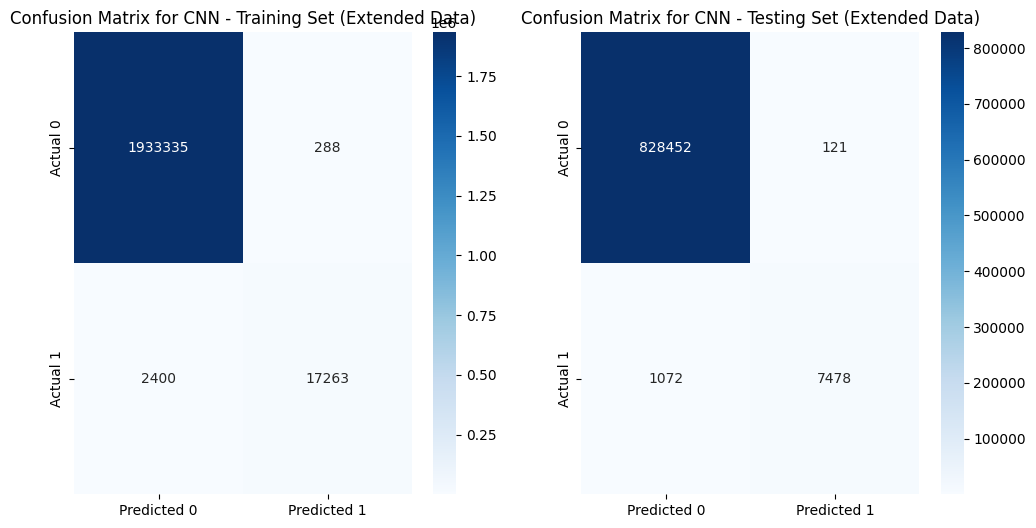

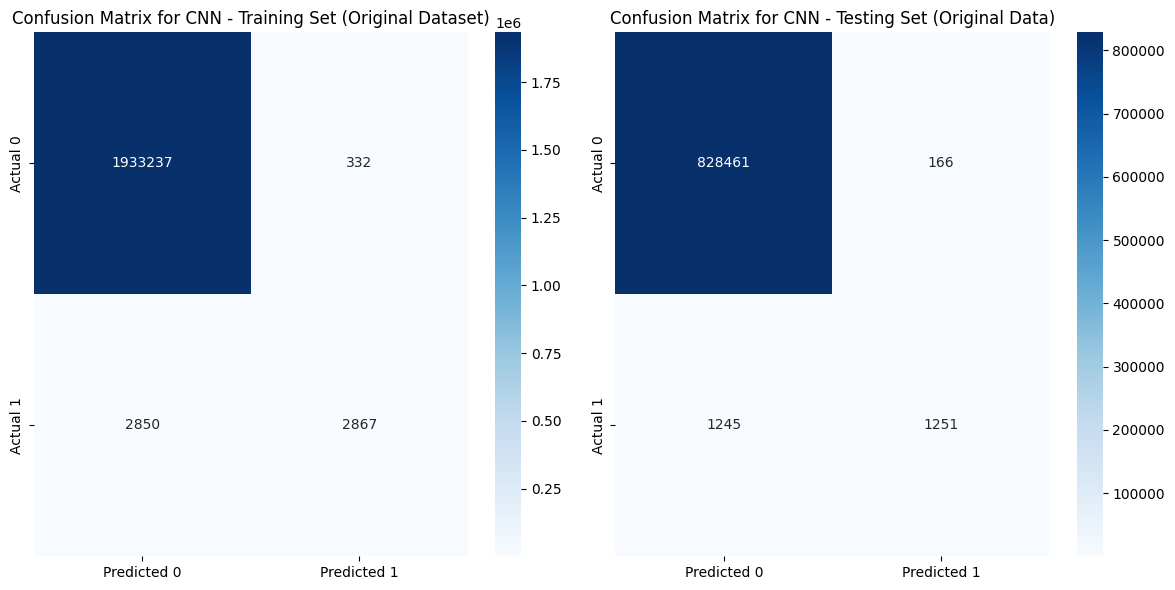

In [ ]:
# Confusion matrices for extended data
train_cm = confusion_matrix(B_train_original, train_pred)
test_cm = confusion_matrix(B_test_original, test_pred)

# Confusion matrices for Original data
train_cm_syn = confusion_matrix(y_train_original, train_pred_syn)
test_cm_syn = confusion_matrix(y_test_original, test_pred_syn)

# Visualize confusion matrix for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CNN - Training Set (Extended Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CNN - Testing Set (Extended Data)')

# Visualize confusion matrix for training set for synthetic data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_syn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CNN - Training Set (Original Dataset)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_syn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CNN - Testing Set (Original Data)')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Confusion matrices for extended data
train_cm_lstm = confusion_matrix(B_train_original, train_pred_lstm)
test_cm_lstm = confusion_matrix(B_test_original, test_pred_lstm)

# Confusion matrices for original data
train_cm_syn_lstm = confusion_matrix(y_train_original, train_pred_lstm_syn)
test_cm_syn_lstm = confusion_matrix(y_test_original, test_pred_lstm_syn)

# Visualize confusion matrix for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM - Training Set (Extended Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM - Testing Set (Extended Data)')

# Visualize confusion matrix for training set for synthetic data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_syn_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM - Training Set (Original Dataset)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_syn_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM - Testing Set (Original Data)')
plt.tight_layout()
plt.show()


NameError: name 'train_pred_lstm' is not defined

**ROC Curve for deep learning models**

25973/25973 [==============================] - 59s 2ms/step


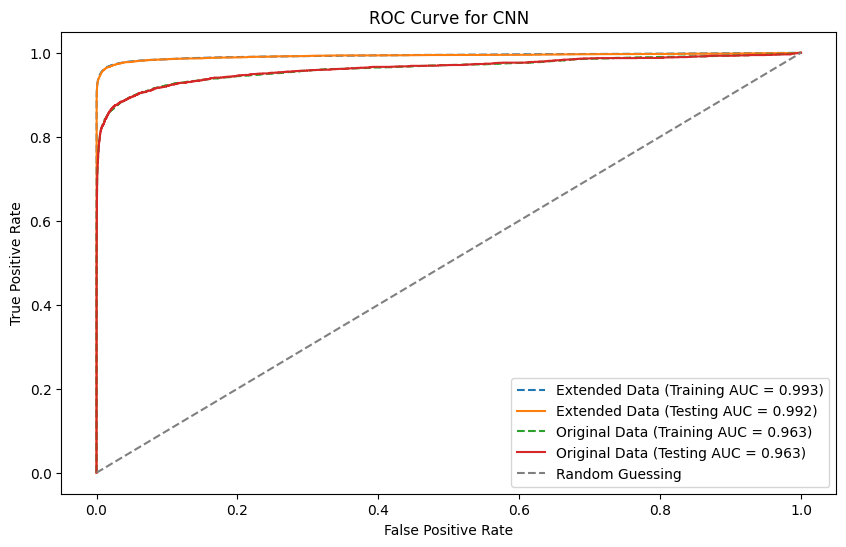

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC and plot ROC curve for the original dataset
y_scores_train_cnn = model.predict(A_train_original)
y_scores_test_cnn = model.predict(A_test_original)

roc_auc_train_cnn = roc_auc_score(B_train_original, y_scores_train_cnn)
roc_auc_test_cnn = roc_auc_score(B_test_original, y_scores_test_cnn)

fpr_train_cnn, tpr_train_cnn, _ = roc_curve(B_train_original, y_scores_train_cnn)
fpr_test_cnn, tpr_test_cnn, _ = roc_curve(B_test_original, y_scores_test_cnn)

# Calculate ROC AUC and plot ROC curve for the synthetic dataset
y_scores_train_cnn_syn = model_cnn_syn.predict(X_train_original)
y_scores_test_cnn_syn = model_cnn_syn.predict(X_test_original)

roc_auc_train_cnn_syn = roc_auc_score(y_train_original, y_scores_train_cnn_syn)
roc_auc_test_cnn_syn = roc_auc_score(y_test_original, y_scores_test_cnn_syn)

fpr_train_cnn_syn, tpr_train_cnn_syn, _ = roc_curve(y_train_original, y_scores_train_cnn_syn)
fpr_test_cnn_syn, tpr_test_cnn_syn, _ = roc_curve(y_test_original, y_scores_test_cnn_syn)

# Plot ROC curves for both datasets (Training and Testing)
plt.figure(figsize=(10, 6))

# Original Data - Training Set
plt.plot(fpr_train_cnn, tpr_train_cnn, label=f'Extended Data (Training AUC = {roc_auc_train_cnn:.3f})', linestyle='--')

# Original Data - Testing Set
plt.plot(fpr_test_cnn, tpr_test_cnn, label=f'Extended Data (Testing AUC = {roc_auc_test_cnn:.3f})')

# Synthetic Data - Training Set
plt.plot(fpr_train_cnn_syn, tpr_train_cnn_syn, label=f'Original Data (Training AUC = {roc_auc_train_cnn_syn:.3f})', linestyle='--')

# Synthetic Data - Testing Set
plt.plot(fpr_test_cnn_syn, tpr_test_cnn_syn, label=f'Original Data (Testing AUC = {roc_auc_test_cnn_syn:.3f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curve for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


25973/25973 [==============================] - 58s 2ms/step


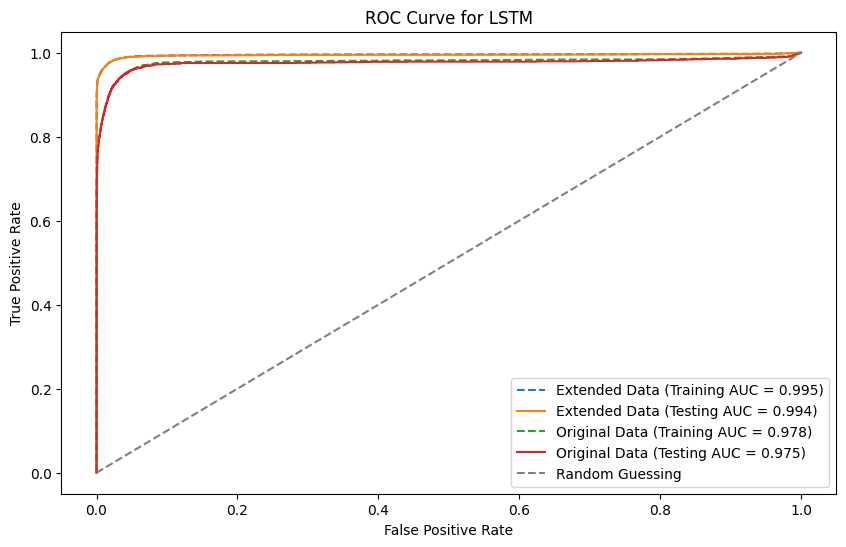

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC AUC and plot ROC curve for the original dataset
y_scores_train_lstm = model_lstm.predict(A_train)
y_scores_test_lstm = model_lstm.predict(A_test)

roc_auc_train_lstm = roc_auc_score(B_train_original, y_scores_train_lstm)
roc_auc_test_lstm = roc_auc_score(B_test_original, y_scores_test_lstm)

fpr_train_lstm, tpr_train_lstm, _ = roc_curve(B_train_original, y_scores_train_lstm)
fpr_test_lstm, tpr_test_lstm, _ = roc_curve(B_test_original, y_scores_test_lstm)

# Calculate ROC AUC and plot ROC curve for the synthetic dataset
y_scores_train_lstm_syn = model_lstm_syn.predict(X_train_lstm_syn)
y_scores_test_lstm_syn = model_lstm_syn.predict(X_test_lstm_syn)

roc_auc_train_lstm_syn = roc_auc_score(y_train_original, y_scores_train_lstm_syn)
roc_auc_test_lstm_syn = roc_auc_score(y_test_original, y_scores_test_lstm_syn)

fpr_train_lstm_syn, tpr_train_lstm_syn, _ = roc_curve(y_train_original, y_scores_train_lstm_syn)
fpr_test_lstm_syn, tpr_test_lstm_syn, _ = roc_curve(y_test_original, y_scores_test_lstm_syn)

# Plot ROC curves for both datasets (Training and Testing)
plt.figure(figsize=(10, 6))

# Original Data - Training Set
plt.plot(fpr_train_lstm, tpr_train_lstm, label=f'Extended Data (Training AUC = {roc_auc_train_lstm:.3f})', linestyle='--')

# Original Data - Testing Set
plt.plot(fpr_test_lstm, tpr_test_lstm, label=f'Extended Data (Testing AUC = {roc_auc_test_lstm:.3f})')

# Synthetic Data - Training Set
plt.plot(fpr_train_lstm_syn, tpr_train_lstm_syn, label=f'Original Data (Training AUC = {roc_auc_train_lstm_syn:.3f})', linestyle='--')

# Synthetic Data - Testing Set
plt.plot(fpr_test_lstm_syn, tpr_test_lstm_syn, label=f'Original Data (Testing AUC = {roc_auc_test_lstm_syn:.3f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Comparion of deep learning models with original and extended dataset**

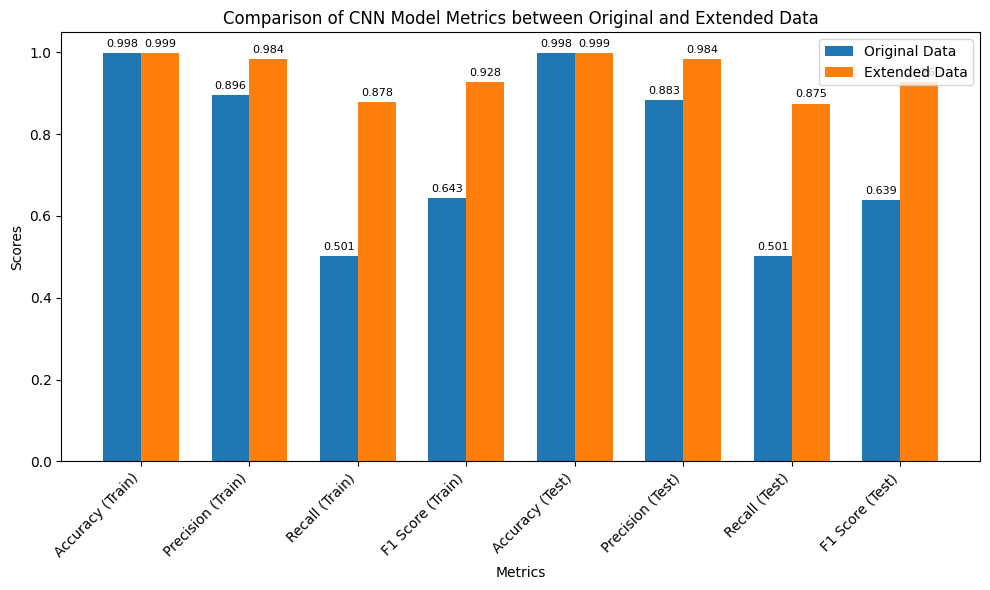

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train_CNN_syn, precision_train_CNN_syn, recall_train_CNN_syn, f1_train_CNN_syn,
                    accuracy_CNN_test_syn, precision_CNN_test_syn, recall_CNN_test_syn, f1_CNN_test_syn]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_CNN, precision_train_CNN, recall_train_CNN, f1_train_CNN,
                     accuracy_original_CNN, precision_original_CNN, recall_original_CNN, f1_original_CNN]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of CNN Model Metrics between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


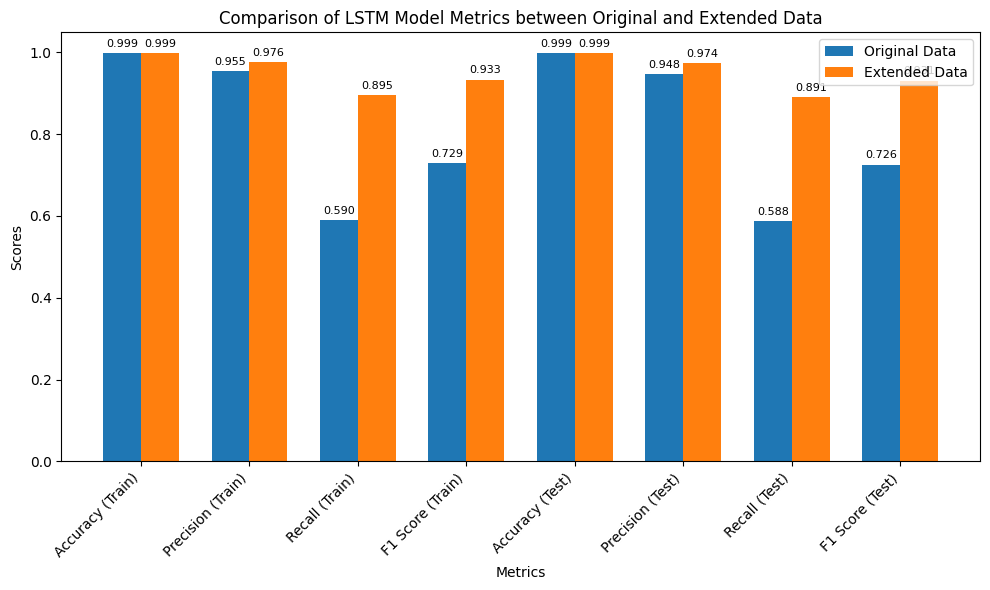

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the original data
metrics_original = [accuracy_train_LSTM_syn, precision_train_LSTM_syn, recall_train_LSTM_syn, f1_train_LSTM_syn,
                    accuracy_test_LSTM_syn, precision_test_LSTM_syn, recall_test_LSTM_syn, f1_test_LSTM_syn]
# Metrics for the synthetic data
metrics_synthetic = [accuracy_train_LSTM, precision_train_LSTM, recall_train_LSTM, f1_train_LSTM,
                     accuracy_test_LSTM, precision_test_LSTM, recall_test_LSTM, f1_test_LSTM]

# Metric names
metric_names = ['Accuracy (Train)', 'Precision (Train)', 'Recall (Train)', 'F1 Score (Train)',
                'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)']

# Plotting
bar_width = 0.35
index = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, metrics_original, bar_width, label='Original Data')
bar2 = ax.bar(index + bar_width, metrics_synthetic, bar_width, label='Extended Data')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LSTM Model Metrics between Original and Extended Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names, rotation=45, ha='right')
ax.legend()

# Display the scores on top of the bars
for i, v in enumerate(metrics_original):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

for i, v in enumerate(metrics_synthetic):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
